In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [2]:
def transform_condition(column):
    # Convert to lowercase
    column = column.lower()
    
    # Replace underscores and slashes
    column = column.replace(' ', '_')
    column = column.replace('/', '_')
    
    return column

In [3]:
import pandas as pd

# Replace with the path to your CSV file
train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(train_csv_path)

In [4]:
import pandas as pd

# Path to the CSV file with condition and level
column_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train_label_coordinates.csv'

# Read the CSV file
column_df = pd.read_csv(column_csv_path)

# Remove rows where 'study_id' is NaN or empty string
column_df = column_df[column_df['study_id'].notna() & (column_df['study_id'] != '')]

# Ensure that columns to be merged are treated as strings
column_df['condition'] = column_df['condition'].astype(str)
column_df['level'] = column_df['level'].astype(str)

# Merge 'condition' and 'level' into a single column
column_df['condition_level'] = column_df['condition'] + '_' + column_df['level']

# Drop the original 'condition' and 'level' columns if no longer needed
# label_df.drop(['condition', 'level'], axis=1, inplace=True)

# Reorder columns if needed to have 'study_id', 'series_id', and 'instance_number' first
column_df = column_df[['study_id', 'series_id', 'instance_number', 'condition_level', 'condition', 'level']]



In [5]:
column_df

,study_id,series_id,instance_number,condition_level,condition,level
0,4003253,702807833,8,Spinal Canal Stenosis_L1/L2,Spinal Canal Stenosis,L1/L2
1,4003253,702807833,8,Spinal Canal Stenosis_L2/L3,Spinal Canal Stenosis,L2/L3
2,4003253,702807833,8,Spinal Canal Stenosis_L3/L4,Spinal Canal Stenosis,L3/L4
3,4003253,702807833,8,Spinal Canal Stenosis_L4/L5,Spinal Canal Stenosis,L4/L5
4,4003253,702807833,8,Spinal Canal Stenosis_L5/S1,Spinal Canal Stenosis,L5/S1
...,...,...,...,...,...,...
48687,4290709089,4237840455,11,Left Neural Foraminal Narrowing_L1/L2,Left Neural Foraminal Narrowing,L1/L2
48688,4290709089,4237840455,12,Left Neural Foraminal Narrowing_L2/L3,Left Neural Foraminal Narrowing,L2/L3
48689,4290709089,4237840455,12,Left Neural Foraminal Narrowing_L3/L4,Left Neural Foraminal Narrowing,L3/L4
48690,4290709089,4237840455,12,Left Neural Foraminal Narrowing_L4/L5,Left Neural Foraminal Narrowing,L4/L5


In [6]:
column_df['condition_level'] = column_df['condition_level'].apply(transform_condition)

In [7]:
column_df = column_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\2743632852.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_df = column_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [8]:
column_df

,study_id,series_id,instance_number,condition_level,condition,level
0,4003253,702807833,8,spinal_canal_stenosis_l1_l2,spinal canal stenosis,l1/l2
1,4003253,702807833,8,spinal_canal_stenosis_l2_l3,spinal canal stenosis,l2/l3
2,4003253,702807833,8,spinal_canal_stenosis_l3_l4,spinal canal stenosis,l3/l4
3,4003253,702807833,8,spinal_canal_stenosis_l4_l5,spinal canal stenosis,l4/l5
4,4003253,702807833,8,spinal_canal_stenosis_l5_s1,spinal canal stenosis,l5/s1
...,...,...,...,...,...,...
48687,4290709089,4237840455,11,left_neural_foraminal_narrowing_l1_l2,left neural foraminal narrowing,l1/l2
48688,4290709089,4237840455,12,left_neural_foraminal_narrowing_l2_l3,left neural foraminal narrowing,l2/l3
48689,4290709089,4237840455,12,left_neural_foraminal_narrowing_l3_l4,left neural foraminal narrowing,l3/l4
48690,4290709089,4237840455,12,left_neural_foraminal_narrowing_l4_l5,left neural foraminal narrowing,l4/l5


In [9]:
grouped = column_df.groupby(['condition_level', 'study_id', 'series_id'])

# Filter groups that have more than one unique 'instance_number'
duplicates = grouped.filter(lambda x: x['instance_number'].nunique() > 1)

# Display the filtered result
print(duplicates)

Empty DataFrame
Columns: [study_id, series_id, instance_number, condition_level, condition, level]
Index: []


In [10]:

df_path

NameError: name 'df_path' is not defined

In [56]:
column_name = 'left_subarticular_stenosis_l1_l2'

df_path = column_df[column_df['condition_level'] == column_name]
train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'
df_train = pd.read_csv(train_csv_path)

# Step 1: Identify NaN study_ids in df_train
nan_study_ids = df_train[df_train[column_name].isna()]['study_id'].tolist()

In [57]:
nan_study_ids

[46494080,
 64092030,
 74782131,
 97086905,
 159721286,
 293713262,
 296083289,
 296284854,
 305152236,
 344297746,
 368848859,
 376723024,
 377653138,
 379677390,
 390498354,
 395898502,
 434488359,
 443364658,
 532925408,
 597329259,
 624881903,
 647348777,
 684790345,
 693432872,
 808539750,
 823937142,
 858422574,
 893250212,
 919752232,
 933559951,
 934686772,
 953218250,
 979209761,
 998688940,
 1040921274,
 1047914296,
 1095894979,
 1105006429,
 1125872530,
 1133158151,
 1169119083,
 1187463765,
 1253598263,
 1278694021,
 1292979992,
 1375057718,
 1395773918,
 1414872844,
 1422523769,
 1423031356,
 1431195383,
 1451886888,
 1452830936,
 1456430985,
 1472262122,
 1504981676,
 1510451897,
 1524089207,
 1557387235,
 1567179188,
 1575827384,
 1613634521,
 1650340034,
 1671291853,
 1678045823,
 1681401548,
 1698156042,
 1722539301,
 1745732011,
 1764741993,
 1833077159,
 1900598881,
 1934246813,
 1956588335,
 1983333974,
 1992037544,
 1995123254,
 2028805796,
 2040217841,
 2097850244

In [59]:
df_filtered.to_csv('df_filtered.csv')

In [90]:
# import pandas as pd
# import os
# import cv2
# import numpy as np
# import pydicom
# from pydicom.pixel_data_handlers.util import apply_voi_lut

# column_name = 'spinal_canal_stenosis_l1_l2'

# df_path = column_df[column_df['condition_level'] == column_name]
# train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'
# df_train = pd.read_csv(train_csv_path)

# # Step 1: Identify NaN study_ids in df_train
# nan_study_ids = df_train[df_train[column_name].isna()]['study_id'].tolist()

# # Step 2: Filter df_path to exclude rows that have study_ids in the NaN list
# df_filtered = df_path[~df_path['study_id'].isin(nan_study_ids)]

# # Only keep relevant columns and drop NaN values
# df_train = df_train[['study_id', column_name]].dropna()

# def read_dicom_image(file_path, voi_lut=True, fix_monochrome=True):
#     dicom = pydicom.dcmread(file_path)
    
#     if voi_lut:
#         data = apply_voi_lut(dicom.pixel_array, dicom)
#     else:
#         data = dicom.pixel_array

#     if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
#         data = np.amax(data) - data

#     data = data - np.min(data)
#     data = data / np.max(data)

#     return (data * 255).astype(np.uint8)

# # Paths to your image directory
# image_base_path = 'E:/data/Lumbar Spine Degenerative Classification/train_images/'
# images = []
# labels = []

# # Iterate over each row in the filtered dataframe to get study_id, series_id, instance_number
# for idx, row in df_filtered.iterrows():
#     study_id = str(row['study_id'])
#     series_id = str(row['series_id'])
#     instance_number = row['instance_number']
    
#     # Construct the path to the series folder
#     series_path = os.path.join(image_base_path, study_id, series_id)
    
#     if not os.path.exists(series_path):
#         print(f"Warning: The path {series_path} does not exist.")
#         continue
    
#     # Search for the image file corresponding to the instance_number
#     file_path = os.path.join(series_path, f"{instance_number}.dcm")
    
#     if not os.path.exists(file_path):
#         print(f"Warning: File {file_path} does not exist.")
#         continue
    
#     try:
#         # Read and process the image
#         image = read_dicom_image(file_path)
        
#         if image.size == 0:
#             print(f"Warning: Skipping file {file_path}, image size is zero.")
#             continue
        
#         # Resize and process the image
#         image = np.array(cv2.resize(image, (50, 50), interpolation=cv2.INTER_AREA))
#         image = np.stack((image,) * 3, axis=-1)
#         image = image.astype('float32') / 255
        
#         # Match the condition_level with the corresponding column in the train CSV
#         label_value = df_train[df_train['study_id'] == int(study_id)][column_name].values
        
#         # Ensure label_value is not empty before using it
#         if len(label_value) > 0:
#             label_value = label_value[0]  # Extract the actual label value
#         else:
#             print(f"Warning: No label found for study_id {study_id}")
#             continue
        
#         images.append(image)
#         labels.append(label_value)
# #     


# # Now read all other files in the same folder and assign them the same label
#         mport os

#         # Sort DICOM files based on the numeric part of the filename
#         dicom_files = sorted(
#             [f for f in os.listdir(series_path) if f.endswith('.dcm')],
#             key=lambda x: int(os.path.splitext(x)[0])
#         )
#         for dicom_file in dicom_files:
#             other_file_path = os.path.join(series_path, dicom_file)
            
#             # Skip the file already processed (instance_number)
#             if dicom_file == f"{instance_number}.dcm":
#                 continue
            
#             try:
#                 # Read and process the remaining DICOM images
#                 other_image = read_dicom_image(other_file_path)
                
#                 if other_image.size == 0:
#                     print(f"Warning: Skipping file {other_file_path}, image size is zero.")
#                     continue
                
#                 # Resize and process the image
#                 other_image = np.array(cv2.resize(other_image, (50, 50), interpolation=cv2.INTER_AREA))
#                 other_image = np.stack((other_image,) * 3, axis=-1)
#                 other_image = other_image.astype('float32') / 255
                
#                 # Append this image and assign it the same label as the first one
#                 images.append(other_image)
#                 labels.append(label_value)
            
#             except Exception as e:
#                 print(f"Error processing file {other_file_path}: {e}")
#                 continue
    

# # 
#     except Exception as e:
#         print(f"Error processing file {file_path}: {e}")
#         continue
    

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

def transform_condition(column):
    # Convert to lowercase
    column = column.lower()
    
    # Replace underscores and slashes
    column = column.replace(' ', '_')
    column = column.replace('/', '_')
    
    return column

data_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv' 
data = pd.read_csv(data_path)  

# columns=['study_id', 'spinal_canal_stenosis_l1_l2']#just to train model=_spinal_canal_stenosis_l1_l2


    # Replace with the path to your CSV file
    train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'

    # Load the CSV file into a DataFrame
df = pd.read_csv(train_csv_path)


    # Path to the CSV file with condition and level
column_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train_label_coordinates.csv'

    # Read the CSV file
column_df = pd.read_csv(column_csv_path)

    # Remove rows where 'study_id' is NaN or empty string
column_df = column_df[column_df['study_id'].notna() & (column_df['study_id'] != '')]

    # Ensure that columns to be merged are treated as strings
column_df['condition'] = column_df['condition'].astype(str)
column_df['level'] = column_df['level'].astype(str)

    # Merge 'condition' and 'level' into a single column
column_df['condition_level'] = column_df['condition'] + '_' + column_df['level']

    # Drop the original 'condition' and 'level' columns if no longer needed
    # label_df.drop(['condition', 'level'], axis=1, inplace=True)

# Reorder columns if needed to have 'study_id', 'series_id', and 'instance_number' first
column_df = column_df[['study_id', 'series_id', 'instance_number', 'condition_level', 'condition', 'level']]


column_df['condition_level'] = column_df['condition_level'].apply(transform_condition)
column_df = column_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)




columns = data.columns                           #This line must be run to get all models
train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'
for column in columns[1:]:
    # Filter the dataframe based on the condition level
    df_path = column_df[column_df['condition_level'] == column_name]

    df_train = pd.read_csv(train_csv_path)

    # Identify NaN study_ids in df_train
    nan_study_ids = df_train[df_train[column_name].isna()]['study_id'].tolist()
    df_filtered = df_path[~df_path['study_id'].isin(nan_study_ids)]
    df_train = df_train[['study_id', column_name]].dropna()

    # Function to read DICOM images
    def read_dicom_image(file_path, voi_lut=True, fix_monochrome=True):
        dicom = pydicom.dcmread(file_path)
        if voi_lut:
            data = apply_voi_lut(dicom.pixel_array, dicom)
        else:
            data = dicom.pixel_array

        if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
            data = np.amax(data) - data

        data = data - np.min(data)
        data = data / np.max(data)

        return (data * 255).astype(np.uint8)

    # Paths to your image directory
    image_base_path = 'E:/data/Lumbar Spine Degenerative Classification/train_images/'
    images = []
    labels = []

    # Iterate over each row in the filtered dataframe to get study_id, series_id, instance_number
    for idx, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0], desc="Processing images"):
    # for idx, row in df_filtered.iterrows():
        study_id = str(row['study_id'])
        series_id = str(row['series_id'])
        instance_number = row['instance_number']

        # Construct the path to the series folder
        series_path = os.path.join(image_base_path, study_id, series_id)

        if not os.path.exists(series_path):
            print(f"Warning: The path {series_path} does not exist.")
            continue

        # Get the label for the current study_id
        label_value = df_train[df_train['study_id'] == int(study_id)][column_name].values
        if len(label_value) > 0:
            label_value = label_value[0]  # Extract the actual label value
        else:
            print(f"Warning: No label found for study_id {study_id}")
            continue

        # Now read all DICOM files in the series path and assign the same label
        dicom_files = sorted(
            [f for f in os.listdir(series_path) if f.lower().endswith('.dcm')],
            key=lambda x: int(os.path.splitext(x)[0])
        )

        for dicom_file in dicom_files:
            other_file_path = os.path.join(series_path, dicom_file)

            # Skip the file if it doesn't exist
            if not os.path.exists(other_file_path):
                print(f"Warning: File {other_file_path} does not exist.")
                continue

            try:
                # Read and process the DICOM image
                other_image = read_dicom_image(other_file_path)

                if other_image.size == 0:
                    print(f"Warning: Skipping file {other_file_path}, image size is zero.")
                    continue

                # Resize and process the image
                other_image = np.array(cv2.resize(other_image, (50, 50), interpolation=cv2.INTER_AREA))
                other_image = np.stack((other_image,) * 3, axis=-1)
                other_image = other_image.astype('float32') / 255

                # Append this image and assign it the same label
                images.append(other_image)
                labels.append(label_value)

            except Exception as e:
                print(f"Error processing file {other_file_path}: {e}")
                continue
     # Ensure labels do not have any None values
    valid_idx = [i for i, label in enumerate(labels) if label is not None]

    # Filter images and labels based on valid indices
    images = np.array([images[i] for i in valid_idx])
    labels = np.array([labels[i] for i in valid_idx])

    # Encode labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Split the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

    # Ensure consistent number of classes for one-hot encoding
    num_classes = len(np.unique(labels_encoded))

    # One-hot encode labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_val = to_categorical(y_val, num_classes=num_classes)

    # Model definition
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(50, 50, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))    
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))    
    model.add(layers.Flatten())  
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))

    # Output layer for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print model summary
    model.summary()

    # Define ModelCheckpoint callback to save the best model based on validation loss
    model_save = f"_{column_name}.keras"  # dynamically use the column name in the model save path
    checkpoint = ModelCheckpoint(
        filepath=model_save,  
        monitor='val_loss',   
        save_best_only=True,  
        verbose=1             
    )

    # Train the model for exactly 30 epochs and save the best model
    history = model.fit(
        x_train, y_train,
        epochs=30,
        batch_size=128,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint]  # Save only the best model
    )

    # Plot the training and validation loss and accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot loss
    ax1.plot(history.history['loss'], label='training')
    ax1.plot(history.history['val_loss'], label='validation')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.set_title('Loss')

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='training')
    ax2.plot(history.history['val_accuracy'], label='validation')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('Accuracy')

    # Display legend
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

    # Show plot
    plt.show()

    print(f"Finished processing column: {column_name}\n")            

IndentationError: unexpected indent (151911716.py, line 29)

In [94]:
len(labels)

32435

C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:63: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  column_df = column_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
Processing images: 100%|██████████| 1904/1904 [24:30<00:00,  1.29it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.8723 - loss: 0.3967
Epoch 1: val_loss improved from inf to 0.22274, saving model to _spinal_canal_stenosis_l1_l2.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 57s 255ms/step - accuracy: 0.8726 - loss: 0.3961 - val_accuracy: 0.9496 - val_loss: 0.2227
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9544 - loss: 0.2126
Epoch 2: val_loss did not improve from 0.22274
203/203 ━━━━━━━━━━━━━━━━━━━━ 80s 247ms/step - accuracy: 0.9544 - loss: 0.2126 - val_accuracy: 0.9496 - val_loss: 0.2282
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9522 - loss: 0.2076
Epoch 3: val_loss improved from 0.22274 to 0.20633, saving model to _spinal_canal_stenosis_l1_l2.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - accuracy: 0.9522 - loss: 0.2076 - val_accuracy: 0.9496 - val_loss: 0.2063
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9528 - loss: 0.2041
Epoch 4: val_loss did not improve from 

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9956 - loss: 0.0119
Epoch 24: val_loss did not improve from 0.01884
203/203 ━━━━━━━━━━━━━━━━━━━━ 50s 248ms/step - accuracy: 0.9956 - loss: 0.0119 - val_accuracy: 0.9863 - val_loss: 0.0497
Epoch 25/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9922 - loss: 0.0242
Epoch 25: val_loss improved from 0.01884 to 0.01228, saving model to _spinal_canal_stenosis_l1_l2.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 51s 249ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9963 - val_loss: 0.0123
Epoch 26/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9975 - loss: 0.0073
Epoch 26: val_loss improved from 0.01228 to 0.01186, saving model to _spinal_canal_stenosis_l1_l2.keras
203/203 ━━━━━━━━━━━━━━━━━━━━ 51s 249ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9958 - val_loss: 0.0119
Epoch 27/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9994 - loss: 0.0025
Epoch 27: val_loss improved from 0.01186

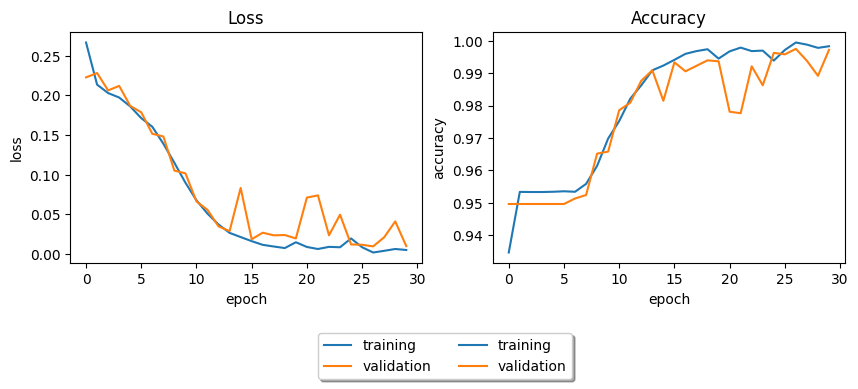

Finished processing column: spinal_canal_stenosis_l1_l2



Processing images: 100%|██████████| 1934/1934 [24:56<00:00,  1.29it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.7989 - loss: 0.6049
Epoch 1: val_loss improved from inf to 0.41235, saving model to _spinal_canal_stenosis_l2_l3.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 57s 254ms/step - accuracy: 0.7993 - loss: 0.6042 - val_accuracy: 0.8944 - val_loss: 0.4123
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.8903 - loss: 0.4020
Epoch 2: val_loss did not improve from 0.41235
206/206 ━━━━━━━━━━━━━━━━━━━━ 50s 244ms/step - accuracy: 0.8903 - loss: 0.4020 - val_accuracy: 0.8944 - val_loss: 0.4126
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8889 - loss: 0.3790
Epoch 3: val_loss improved from 0.41235 to 0.35119, saving model to _spinal_canal_stenosis_l2_l3.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 52s 254ms/step - accuracy: 0.8889 - loss: 0.3789 - val_accuracy: 0.8944 - val_loss: 0.3512
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8934 - loss: 0.3403
Epoch 4: val_loss did not improve from 

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9972 - loss: 0.0093
Epoch 24: val_loss did not improve from 0.05056
206/206 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9839 - val_loss: 0.0537
Epoch 25/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9953 - loss: 0.0144
Epoch 25: val_loss improved from 0.05056 to 0.04138, saving model to _spinal_canal_stenosis_l2_l3.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 52s 250ms/step - accuracy: 0.9953 - loss: 0.0144 - val_accuracy: 0.9866 - val_loss: 0.0414
Epoch 26/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9976 - loss: 0.0068
Epoch 26: val_loss did not improve from 0.04138
206/206 ━━━━━━━━━━━━━━━━━━━━ 51s 249ms/step - accuracy: 0.9976 - loss: 0.0068 - val_accuracy: 0.9812 - val_loss: 0.0842
Epoch 27/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9967 - loss: 0.0089
Epoch 27: val_loss did not improve from 0.04138
206/206 ━━━━━━━━━━━━━━━━━━━━ 51s 249ms/step - ac

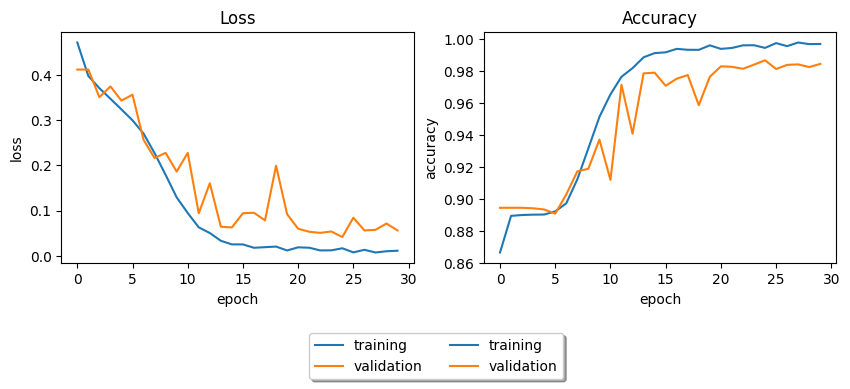

Finished processing column: spinal_canal_stenosis_l2_l3



Processing images: 100%|██████████| 1973/1973 [25:32<00:00,  1.29it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.7368 - loss: 0.7672
Epoch 1: val_loss improved from inf to 0.61867, saving model to _spinal_canal_stenosis_l3_l4.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 263ms/step - accuracy: 0.7370 - loss: 0.7667 - val_accuracy: 0.8088 - val_loss: 0.6187
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8111 - loss: 0.5982
Epoch 2: val_loss improved from 0.61867 to 0.58190, saving model to _spinal_canal_stenosis_l3_l4.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.8111 - loss: 0.5981 - val_accuracy: 0.8094 - val_loss: 0.5819
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8121 - loss: 0.5458
Epoch 3: val_loss improved from 0.58190 to 0.56872, saving model to _spinal_canal_stenosis_l3_l4.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.8122 - loss: 0.5457 - val_accuracy: 0.8019 - val_loss: 0.5687
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.813

210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9922 - loss: 0.0216
Epoch 24: val_loss improved from 0.09758 to 0.07898, saving model to _spinal_canal_stenosis_l3_l4.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 51s 243ms/step - accuracy: 0.9922 - loss: 0.0216 - val_accuracy: 0.9738 - val_loss: 0.0790
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9965 - loss: 0.0109
Epoch 25: val_loss did not improve from 0.07898
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 250ms/step - accuracy: 0.9965 - loss: 0.0109 - val_accuracy: 0.9754 - val_loss: 0.0989
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9952 - loss: 0.0144
Epoch 26: val_loss did not improve from 0.07898
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 248ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9762 - val_loss: 0.0893
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9959 - loss: 0.0140
Epoch 27: val_loss did not improve from 0.07898
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - ac

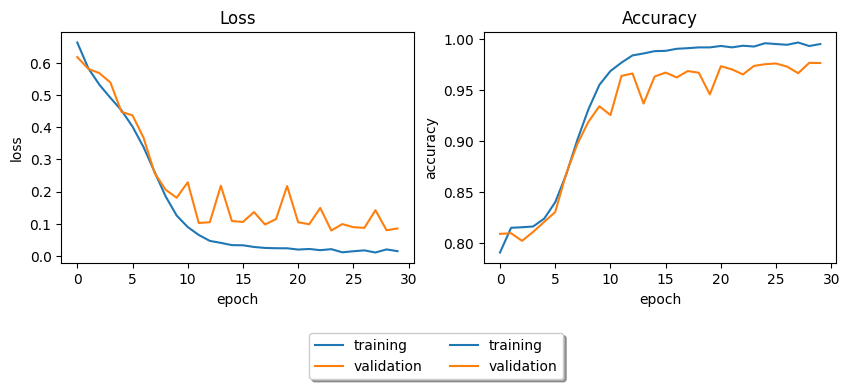

Finished processing column: spinal_canal_stenosis_l3_l4



Processing images: 100%|██████████| 1972/1972 [25:22<00:00,  1.30it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6851 - loss: 0.8808
Epoch 1: val_loss improved from inf to 0.90762, saving model to _spinal_canal_stenosis_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 265ms/step - accuracy: 0.6852 - loss: 0.8805 - val_accuracy: 0.7431 - val_loss: 0.9076
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7362 - loss: 0.7605
Epoch 2: val_loss improved from 0.90762 to 0.74478, saving model to _spinal_canal_stenosis_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 79s 251ms/step - accuracy: 0.7362 - loss: 0.7604 - val_accuracy: 0.7364 - val_loss: 0.7448
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7347 - loss: 0.7209
Epoch 3: val_loss improved from 0.74478 to 0.70032, saving model to _spinal_canal_stenosis_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 253ms/step - accuracy: 0.7347 - loss: 0.7208 - val_accuracy: 0.7434 - val_loss: 0.7003
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.741

Epoch 24/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9940 - loss: 0.0178
Epoch 24: val_loss did not improve from 0.11343
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9541 - val_loss: 0.1619
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9916 - loss: 0.0218
Epoch 25: val_loss did not improve from 0.11343
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9916 - loss: 0.0218 - val_accuracy: 0.9565 - val_loss: 0.1464
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9906 - loss: 0.0272
Epoch 26: val_loss did not improve from 0.11343
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 248ms/step - accuracy: 0.9906 - loss: 0.0272 - val_accuracy: 0.9612 - val_loss: 0.1487
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9942 - loss: 0.0175
Epoch 27: val_loss did not improve from 0.11343
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 253ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy

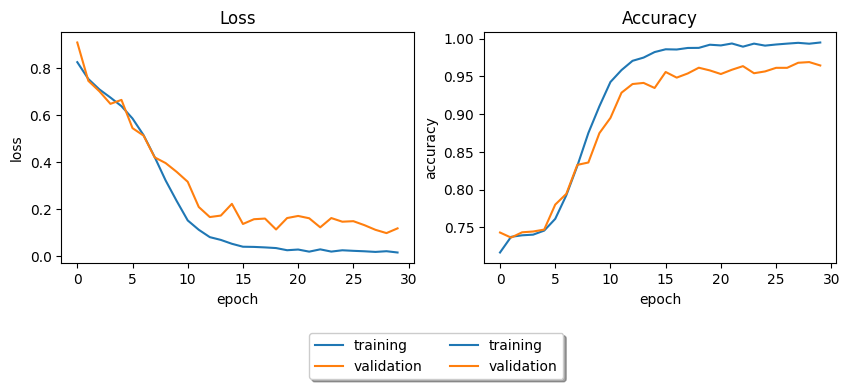

Finished processing column: spinal_canal_stenosis_l4_l5



Processing images: 100%|██████████| 1970/1970 [25:03<00:00,  1.31it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.9086 - loss: 0.3234
Epoch 1: val_loss improved from inf to 0.20686, saving model to _spinal_canal_stenosis_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 266ms/step - accuracy: 0.9088 - loss: 0.3230 - val_accuracy: 0.9631 - val_loss: 0.2069
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9637 - loss: 0.1934
Epoch 2: val_loss improved from 0.20686 to 0.18349, saving model to _spinal_canal_stenosis_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 258ms/step - accuracy: 0.9637 - loss: 0.1934 - val_accuracy: 0.9631 - val_loss: 0.1835
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9662 - loss: 0.1757
Epoch 3: val_loss improved from 0.18349 to 0.18237, saving model to _spinal_canal_stenosis_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 252ms/step - accuracy: 0.9662 - loss: 0.1758 - val_accuracy: 0.9631 - val_loss: 0.1824
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.966

210/210 ━━━━━━━━━━━━━━━━━━━━ 50s 238ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9931 - val_loss: 0.0221
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9972 - loss: 0.0069
Epoch 25: val_loss did not improve from 0.01391
210/210 ━━━━━━━━━━━━━━━━━━━━ 50s 238ms/step - accuracy: 0.9972 - loss: 0.0069 - val_accuracy: 0.9939 - val_loss: 0.0210
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9985 - loss: 0.0051
Epoch 26: val_loss did not improve from 0.01391
210/210 ━━━━━━━━━━━━━━━━━━━━ 50s 238ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9960 - val_loss: 0.0143
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9984 - loss: 0.0047
Epoch 27: val_loss improved from 0.01391 to 0.00810, saving model to _spinal_canal_stenosis_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.9984 - loss: 0.0048 - val_accuracy: 0.9972 - val_loss: 0.0081
Epoch 28/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/ste

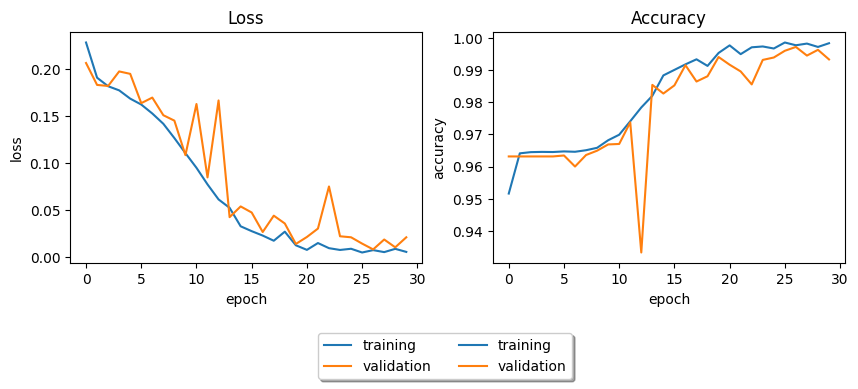

Finished processing column: spinal_canal_stenosis_l5_s1



Processing images: 100%|██████████| 1972/1972 [31:30<00:00,  1.04it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9004 - loss: 0.3029
Epoch 1: val_loss improved from inf to 0.18025, saving model to _left_neural_foraminal_narrowing_l1_l2.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 62s 268ms/step - accuracy: 0.9007 - loss: 0.3024 - val_accuracy: 0.9596 - val_loss: 0.1803
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9638 - loss: 0.1650
Epoch 2: val_loss improved from 0.18025 to 0.17493, saving model to _left_neural_foraminal_narrowing_l1_l2.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 247ms/step - accuracy: 0.9638 - loss: 0.1650 - val_accuracy: 0.9590 - val_loss: 0.1749
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9646 - loss: 0.1556
Epoch 3: val_loss improved from 0.17493 to 0.17467, saving model to _left_neural_foraminal_narrowing_l1_l2.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 49s 236ms/step - accuracy: 0.9646 - loss: 0.1556 - val_accuracy: 0.9596 - val_loss: 0.1747
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0

Epoch 24/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9983 - loss: 0.0054
Epoch 24: val_loss did not improve from 0.01102
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 245ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9966 - val_loss: 0.0119
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9988 - loss: 0.0039
Epoch 25: val_loss did not improve from 0.01102
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.9988 - loss: 0.0040 - val_accuracy: 0.9849 - val_loss: 0.0607
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9965 - loss: 0.0099
Epoch 26: val_loss did not improve from 0.01102
210/210 ━━━━━━━━━━━━━━━━━━━━ 51s 241ms/step - accuracy: 0.9965 - loss: 0.0099 - val_accuracy: 0.9942 - val_loss: 0.0230
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9979 - loss: 0.0057
Epoch 27: val_loss did not improve from 0.01102
210/210 ━━━━━━━━━━━━━━━━━━━━ 50s 238ms/step - accuracy: 0.9979 - loss: 0.0057 - val_accuracy

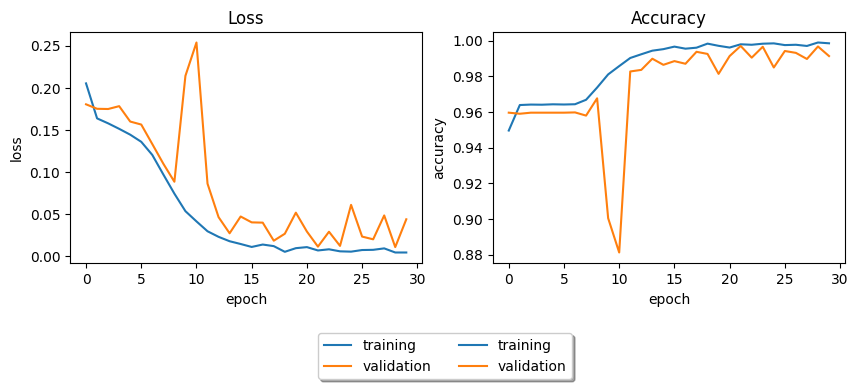

Finished processing column: left_neural_foraminal_narrowing_l1_l2



Processing images: 100%|██████████| 1972/1972 [26:52<00:00,  1.22it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8734 - loss: 0.4499
Epoch 1: val_loss improved from inf to 0.44773, saving model to _left_neural_foraminal_narrowing_l2_l3.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 264ms/step - accuracy: 0.8735 - loss: 0.4497 - val_accuracy: 0.9015 - val_loss: 0.4477
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9036 - loss: 0.3524
Epoch 2: val_loss improved from 0.44773 to 0.34081, saving model to _left_neural_foraminal_narrowing_l2_l3.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 55s 261ms/step - accuracy: 0.9036 - loss: 0.3524 - val_accuracy: 0.9013 - val_loss: 0.3408
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9058 - loss: 0.3348
Epoch 3: val_loss did not improve from 0.34081
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 259ms/step - accuracy: 0.9058 - loss: 0.3348 - val_accuracy: 0.9015 - val_loss: 0.3518
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.9035 - loss: 0.3236
Epoch 4: val_loss i

Epoch 24/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9966 - loss: 0.0103
Epoch 24: val_loss did not improve from 0.02717
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 258ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9879 - val_loss: 0.0426
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9988 - loss: 0.0050
Epoch 25: val_loss did not improve from 0.02717
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 258ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9915 - val_loss: 0.0334
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 26: val_loss did not improve from 0.02717
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 259ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9878 - val_loss: 0.0448
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9974 - loss: 0.0070
Epoch 27: val_loss did not improve from 0.02717
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 259ms/step - accuracy: 0.9974 - loss: 0.0070 - val_accuracy

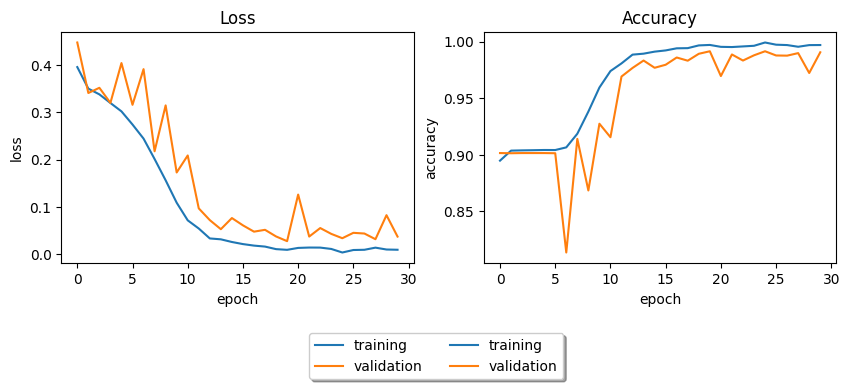

Finished processing column: left_neural_foraminal_narrowing_l2_l3



Processing images: 100%|██████████| 1972/1972 [26:32<00:00,  1.24it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6793 - loss: 0.8150
Epoch 1: val_loss improved from inf to 0.65659, saving model to _left_neural_foraminal_narrowing_l3_l4.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 264ms/step - accuracy: 0.6795 - loss: 0.8145 - val_accuracy: 0.7627 - val_loss: 0.6566
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.7465 - loss: 0.6584
Epoch 2: val_loss improved from 0.65659 to 0.64474, saving model to _left_neural_foraminal_narrowing_l3_l4.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 55s 263ms/step - accuracy: 0.7465 - loss: 0.6584 - val_accuracy: 0.7627 - val_loss: 0.6447
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7594 - loss: 0.6189
Epoch 3: val_loss did not improve from 0.64474
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.7594 - loss: 0.6188 - val_accuracy: 0.7629 - val_loss: 0.7074
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.7621 - loss: 0.5815
Epoch 4: val_loss i

Epoch 24/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9932 - loss: 0.0176
Epoch 24: val_loss did not improve from 0.08865
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 258ms/step - accuracy: 0.9932 - loss: 0.0176 - val_accuracy: 0.9490 - val_loss: 0.2162
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 25: val_loss did not improve from 0.08865
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9684 - val_loss: 0.0952
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9939 - loss: 0.0185
Epoch 26: val_loss did not improve from 0.08865
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 256ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9657 - val_loss: 0.1150
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9920 - loss: 0.0232
Epoch 27: val_loss did not improve from 0.08865
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 259ms/step - accuracy: 0.9920 - loss: 0.0232 - val_accuracy

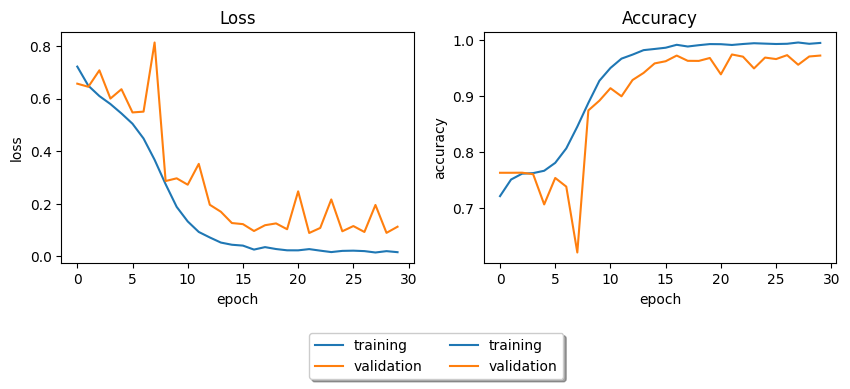

Finished processing column: left_neural_foraminal_narrowing_l3_l4



Processing images: 100%|██████████| 1972/1972 [26:33<00:00,  1.24it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5108 - loss: 1.0555
Epoch 1: val_loss improved from inf to 0.86316, saving model to _left_neural_foraminal_narrowing_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 264ms/step - accuracy: 0.5109 - loss: 1.0551 - val_accuracy: 0.5816 - val_loss: 0.8632
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.5805 - loss: 0.8948
Epoch 2: val_loss did not improve from 0.86316
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 263ms/step - accuracy: 0.5806 - loss: 0.8948 - val_accuracy: 0.4017 - val_loss: 0.9760
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5917 - loss: 0.8524
Epoch 3: val_loss did not improve from 0.86316
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 258ms/step - accuracy: 0.5918 - loss: 0.8523 - val_accuracy: 0.5776 - val_loss: 0.8701
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6103 - loss: 0.7981
Epoch 4: val_loss did not improve from 0.86316
210/210 ━━━━━━━━━━━━━━━━━━━━ 55s 260ms

Epoch 24/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9907 - loss: 0.0281
Epoch 24: val_loss did not improve from 0.18207
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9393 - val_loss: 0.2142
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9919 - loss: 0.0236
Epoch 25: val_loss did not improve from 0.18207
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.9919 - loss: 0.0237 - val_accuracy: 0.9204 - val_loss: 0.3136
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9895 - loss: 0.0278
Epoch 26: val_loss did not improve from 0.18207
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 252ms/step - accuracy: 0.9895 - loss: 0.0278 - val_accuracy: 0.9383 - val_loss: 0.2122
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9927 - loss: 0.0226
Epoch 27: val_loss did not improve from 0.18207
210/210 ━━━━━━━━━━━━━━━━━━━━ 56s 264ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy

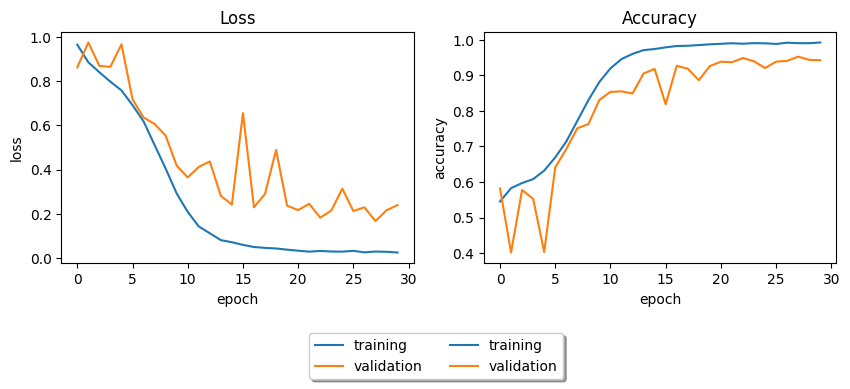

Finished processing column: left_neural_foraminal_narrowing_l4_l5



Processing images: 100%|██████████| 1972/1972 [27:48<00:00,  1.18it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.5533 - loss: 1.0508
Epoch 1: val_loss improved from inf to 0.89056, saving model to _left_neural_foraminal_narrowing_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 59s 252ms/step - accuracy: 0.5534 - loss: 1.0506 - val_accuracy: 0.6223 - val_loss: 0.8906
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.6024 - loss: 0.9225
Epoch 2: val_loss did not improve from 0.89056
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.6024 - loss: 0.9225 - val_accuracy: 0.2814 - val_loss: 1.0758
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.6152 - loss: 0.8788
Epoch 3: val_loss did not improve from 0.89056
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 248ms/step - accuracy: 0.6152 - loss: 0.8787 - val_accuracy: 0.2756 - val_loss: 1.0635
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.6255 - loss: 0.8405
Epoch 4: val_loss improved from 0.89056 to 0.80374, saving model to _left_neural_fora

Epoch 24/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9926 - loss: 0.0220
Epoch 24: val_loss improved from 0.09574 to 0.07214, saving model to _left_neural_foraminal_narrowing_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 256ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9776 - val_loss: 0.0721
Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 25: val_loss did not improve from 0.07214
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9712 - val_loss: 0.0983
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9915 - loss: 0.0272
Epoch 26: val_loss did not improve from 0.07214
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 252ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9459 - val_loss: 0.1961
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9921 - loss: 0.0222
Epoch 27: val_loss did not improve from 0.07214
210/210 ━━━━━━━━━━━━━━━━━━

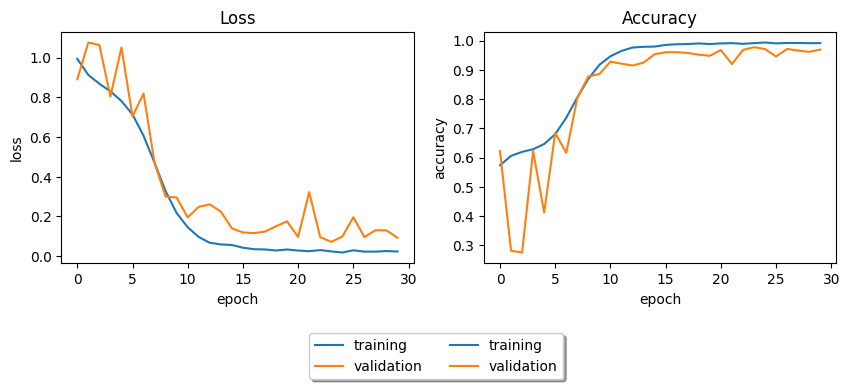

Finished processing column: left_neural_foraminal_narrowing_l5_s1



Processing images: 100%|██████████| 1966/1966 [27:26<00:00,  1.19it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.9115 - loss: 0.3198
Epoch 1: val_loss improved from inf to 0.25305, saving model to _right_neural_foraminal_narrowing_l1_l2.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 366ms/step - accuracy: 0.9116 - loss: 0.3195 - val_accuracy: 0.9617 - val_loss: 0.2531
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.9584 - loss: 0.2103
Epoch 2: val_loss did not improve from 0.25305
210/210 ━━━━━━━━━━━━━━━━━━━━ 93s 445ms/step - accuracy: 0.9584 - loss: 0.2103 - val_accuracy: 0.9517 - val_loss: 0.2835
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.9565 - loss: 0.2086
Epoch 3: val_loss improved from 0.25305 to 0.23893, saving model to _right_neural_foraminal_narrowing_l1_l2.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 143s 450ms/step - accuracy: 0.9565 - loss: 0.2086 - val_accuracy: 0.9617 - val_loss: 0.2389
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.9577 - loss: 0.2107
Epoch 4: val_los

Epoch 25/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9833 - loss: 0.0513
Epoch 25: val_loss did not improve from 0.04867
210/210 ━━━━━━━━━━━━━━━━━━━━ 93s 443ms/step - accuracy: 0.9833 - loss: 0.0513 - val_accuracy: 0.9776 - val_loss: 0.1032
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9937 - loss: 0.0150
Epoch 26: val_loss improved from 0.04867 to 0.04782, saving model to _right_neural_foraminal_narrowing_l1_l2.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 143s 448ms/step - accuracy: 0.9937 - loss: 0.0150 - val_accuracy: 0.9886 - val_loss: 0.0478
Epoch 27/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.9976 - loss: 0.0079
Epoch 27: val_loss did not improve from 0.04782
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 443ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9812 - val_loss: 0.0862
Epoch 28/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.9977 - loss: 0.0075
Epoch 28: val_loss improved from 0.04782 to 0.03379, saving model to _r

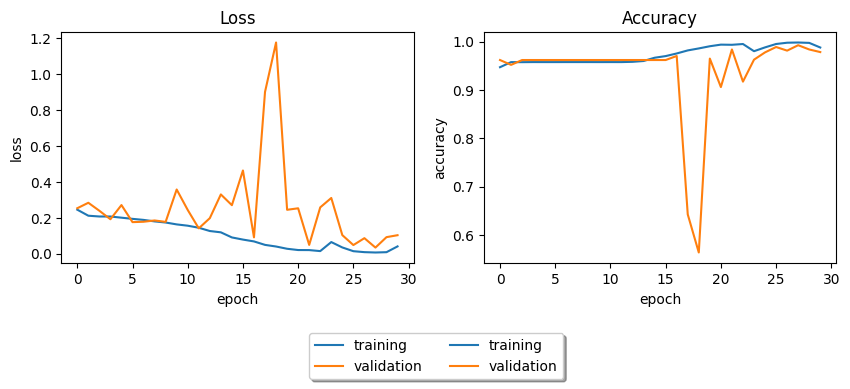

Finished processing column: right_neural_foraminal_narrowing_l1_l2



Processing images: 100%|██████████| 1966/1966 [35:37<00:00,  1.09s/it]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7830 - loss: 0.6033
Epoch 1: val_loss improved from inf to 0.32408, saving model to _right_neural_foraminal_narrowing_l2_l3.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 60s 256ms/step - accuracy: 0.7838 - loss: 0.6016 - val_accuracy: 0.9118 - val_loss: 0.3241
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9029 - loss: 0.3499
Epoch 2: val_loss did not improve from 0.32408
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 247ms/step - accuracy: 0.9029 - loss: 0.3499 - val_accuracy: 0.9133 - val_loss: 0.3289
Epoch 3/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9076 - loss: 0.3403
Epoch 3: val_loss improved from 0.32408 to 0.29635, saving model to _right_neural_foraminal_narrowing_l2_l3.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.9076 - loss: 0.3403 - val_accuracy: 0.9133 - val_loss: 0.2963
Epoch 4/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9076 - loss: 0.3180
Epoch 4: val_loss

210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.9970 - loss: 0.0078 - val_accuracy: 0.9738 - val_loss: 0.0827
Epoch 24/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9875 - loss: 0.0360
Epoch 24: val_loss did not improve from 0.03806
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 247ms/step - accuracy: 0.9875 - loss: 0.0359 - val_accuracy: 0.9851 - val_loss: 0.0565
Epoch 25/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9975 - loss: 0.0079
Epoch 25: val_loss did not improve from 0.03806
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 251ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9870 - val_loss: 0.0442
Epoch 26/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9959 - loss: 0.0111
Epoch 26: val_loss improved from 0.03806 to 0.02946, saving model to _right_neural_foraminal_narrowing_l2_l3.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.9959 - loss: 0.0111 - val_accuracy: 0.9907 - val_loss: 0.0295
Epoch 27/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0

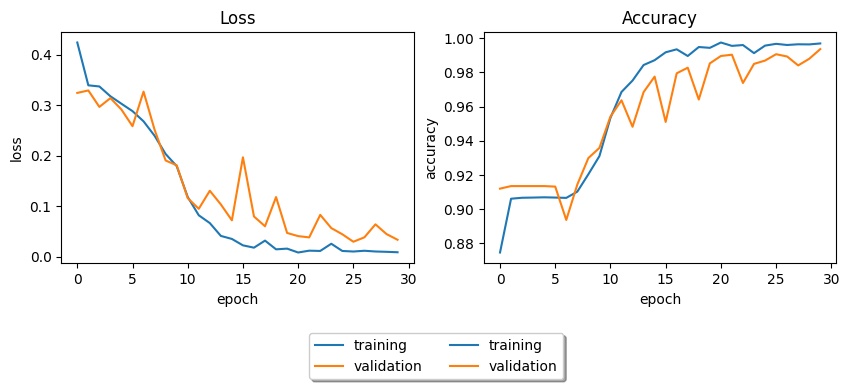

Finished processing column: right_neural_foraminal_narrowing_l2_l3



Processing images: 100%|██████████| 1965/1965 [27:30<00:00,  1.19it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.6614 - loss: 0.8376
Epoch 1: val_loss improved from inf to 0.62941, saving model to _right_neural_foraminal_narrowing_l3_l4.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 63s 254ms/step - accuracy: 0.6617 - loss: 0.8370 - val_accuracy: 0.7603 - val_loss: 0.6294
Epoch 2/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7590 - loss: 0.6196
Epoch 2: val_loss did not improve from 0.62941
209/209 ━━━━━━━━━━━━━━━━━━━━ 52s 250ms/step - accuracy: 0.7590 - loss: 0.6196 - val_accuracy: 0.6000 - val_loss: 0.7402
Epoch 3/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.7617 - loss: 0.5933
Epoch 3: val_loss improved from 0.62941 to 0.58374, saving model to _right_neural_foraminal_narrowing_l3_l4.keras
209/209 ━━━━━━━━━━━━━━━━━━━━ 56s 265ms/step - accuracy: 0.7617 - loss: 0.5933 - val_accuracy: 0.7601 - val_loss: 0.5837
Epoch 4/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7615 - loss: 0.5642
Epoch 4: val_loss

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9928 - loss: 0.0217
Epoch 24: val_loss did not improve from 0.05659
209/209 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9756 - val_loss: 0.0937
Epoch 25/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.9940 - loss: 0.0165
Epoch 25: val_loss did not improve from 0.05659
209/209 ━━━━━━━━━━━━━━━━━━━━ 53s 252ms/step - accuracy: 0.9940 - loss: 0.0165 - val_accuracy: 0.9767 - val_loss: 0.0879
Epoch 26/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9952 - loss: 0.0128
Epoch 26: val_loss did not improve from 0.05659
209/209 ━━━━━━━━━━━━━━━━━━━━ 54s 259ms/step - accuracy: 0.9952 - loss: 0.0129 - val_accuracy: 0.9759 - val_loss: 0.0819
Epoch 27/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9948 - loss: 0.0153
Epoch 27: val_loss did not improve from 0.05659
209/209 ━━━━━━━━━━━━━━━━━━━━ 51s 246ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9632 - v

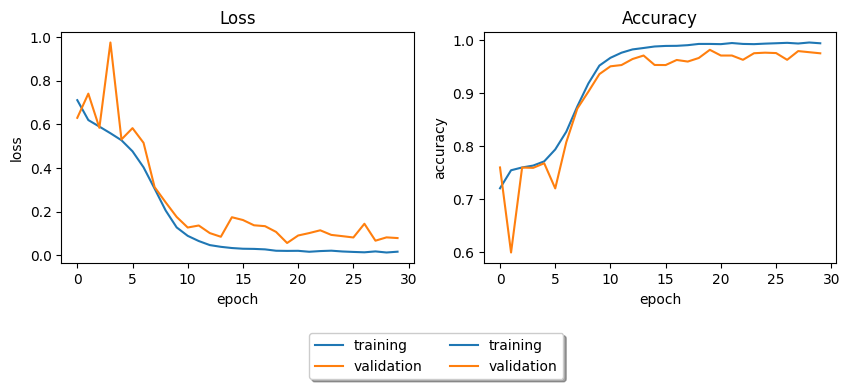

Finished processing column: right_neural_foraminal_narrowing_l3_l4



Processing images: 100%|██████████| 1966/1966 [27:19<00:00,  1.20it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5110 - loss: 1.0315
Epoch 1: val_loss improved from inf to 0.96257, saving model to _right_neural_foraminal_narrowing_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 59s 251ms/step - accuracy: 0.5112 - loss: 1.0311 - val_accuracy: 0.3623 - val_loss: 0.9626
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5832 - loss: 0.8811
Epoch 2: val_loss improved from 0.96257 to 0.86668, saving model to _right_neural_foraminal_narrowing_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.5833 - loss: 0.8810 - val_accuracy: 0.5835 - val_loss: 0.8667
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.6011 - loss: 0.8212
Epoch 3: val_loss improved from 0.86668 to 0.81751, saving model to _right_neural_foraminal_narrowing_l4_l5.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 257ms/step - accuracy: 0.6011 - loss: 0.8211 - val_accuracy: 0.5924 - val_loss: 0.8175
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━

209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.7465 - loss: 0.6398
Epoch 24: val_loss did not improve from 0.07706
210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 259ms/step - accuracy: 0.7472 - loss: 0.6379 - val_accuracy: 0.9063 - val_loss: 0.2809
Epoch 25/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9460 - loss: 0.1531
Epoch 25: val_loss did not improve from 0.07706
210/210 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - accuracy: 0.9461 - loss: 0.1526 - val_accuracy: 0.9620 - val_loss: 0.1137
Epoch 26/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9833 - loss: 0.0450
Epoch 26: val_loss did not improve from 0.07706
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 246ms/step - accuracy: 0.9833 - loss: 0.0450 - val_accuracy: 0.9685 - val_loss: 0.1106
Epoch 27/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9915 - loss: 0.0255
Epoch 27: val_loss did not improve from 0.07706
210/210 ━━━━━━━━━━━━━━━━━━━━ 52s 247ms/step - accuracy: 0.9915 - loss: 0.0255 - val_accuracy: 0.9538 - v

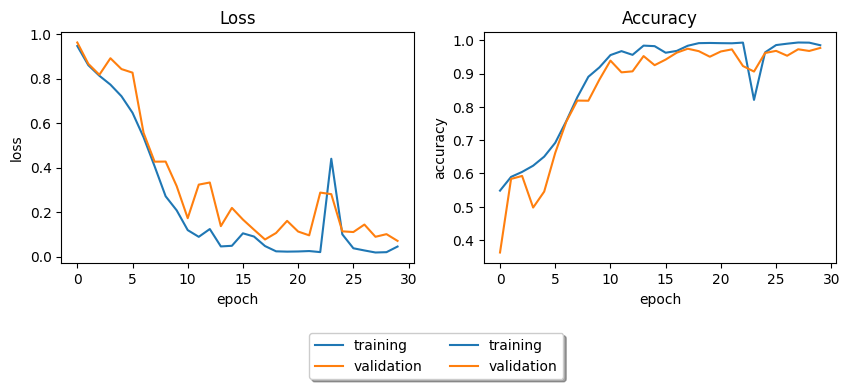

Finished processing column: right_neural_foraminal_narrowing_l4_l5



Processing images: 100%|██████████| 1966/1966 [27:51<00:00,  1.18it/s]
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.5397 - loss: 1.0833
Epoch 1: val_loss improved from inf to 0.88541, saving model to _right_neural_foraminal_narrowing_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 62s 268ms/step - accuracy: 0.5402 - loss: 1.0824 - val_accuracy: 0.6419 - val_loss: 0.8854
Epoch 2/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6205 - loss: 0.9122
Epoch 2: val_loss did not improve from 0.88541
210/210 ━━━━━━━━━━━━━━━━━━━━ 55s 264ms/step - accuracy: 0.6205 - loss: 0.9121 - val_accuracy: 0.6427 - val_loss: 0.9523
Epoch 3/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6334 - loss: 0.8995
Epoch 3: val_loss did not improve from 0.88541
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 253ms/step - accuracy: 0.6334 - loss: 0.8993 - val_accuracy: 0.6425 - val_loss: 0.9056
Epoch 4/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6460 - loss: 0.8601
Epoch 4: val_loss did not improve from 0.88541
210/210 ━━━━━━━━━━━━━━━━━━━━ 53s 253m

209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.9724 - loss: 0.0820
Epoch 24: val_loss did not improve from 0.17803
210/210 ━━━━━━━━━━━━━━━━━━━━ 56s 267ms/step - accuracy: 0.9725 - loss: 0.0817 - val_accuracy: 0.9405 - val_loss: 0.1912
Epoch 25/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.9601 - loss: 0.1149
Epoch 25: val_loss did not improve from 0.17803
210/210 ━━━━━━━━━━━━━━━━━━━━ 55s 263ms/step - accuracy: 0.9603 - loss: 0.1145 - val_accuracy: 0.9329 - val_loss: 0.2038
Epoch 26/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9782 - loss: 0.0636
Epoch 26: val_loss did not improve from 0.17803
210/210 ━━━━━━━━━━━━━━━━━━━━ 56s 264ms/step - accuracy: 0.9783 - loss: 0.0635 - val_accuracy: 0.9284 - val_loss: 0.2295
Epoch 27/30
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9623 - loss: 0.1084
Epoch 27: val_loss improved from 0.17803 to 0.14296, saving model to _right_neural_foraminal_narrowing_l5_s1.keras
210/210 ━━━━━━━━━━━━━━━━━━━━ 57s 274m

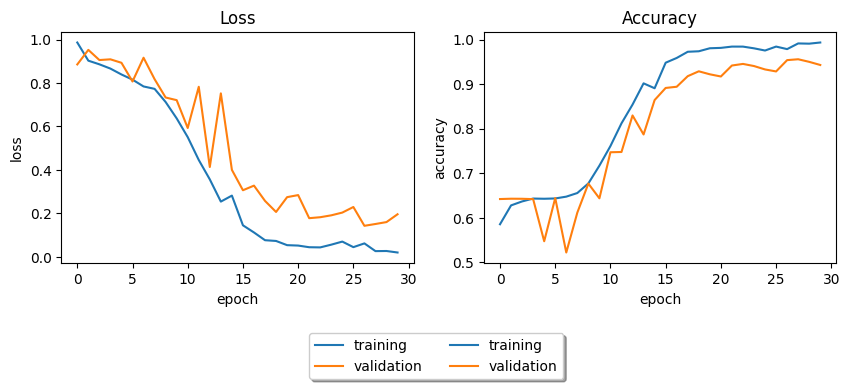

Finished processing column: right_neural_foraminal_narrowing_l5_s1



Processing images:  17%|█▋        | 309/1809 [08:45<49:35,  1.98s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1809/1809 [57:06<00:00,  1.89s/it]  
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8930 - loss: 0.3874
Epoch 1: val_loss improved from inf to 0.27133, saving model to _left_subarticular_stenosis_l1_l2.keras
412/412 ━━━━━━━━━━━━━━━━━━━━ 127s 286ms/step - accuracy: 0.8931 - loss: 0.3872 - val_accuracy: 0.9359 - val_loss: 0.2713
Epoch 2/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9352 - loss: 0.2733
Epoch 2: val_loss did not improve from 0.27133
412/412 ━━━━━━━━━━━━━━━━━━━━ 115s 280ms/step - accuracy: 0.9352 - loss: 0.2733 - val_accuracy: 0.9365 - val_loss: 0.3093
Epoch 3/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.9362 - loss: 0.2524
Epoch 3: val_loss improved from 0.27133 to 0.26573, saving model to _left_subarticular_stenosis_l1_l2.keras
412/412 ━━━━━━━━━━━━━━━━━━━━ 112s 272ms/step - accuracy: 0.9362 - loss: 0.2524 - val_accuracy: 0.9365 - val_loss: 0.2657
Epoch 4/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9352 - loss: 0.2346
Epoch 4: val_loss improved

412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 24: val_loss did not improve from 0.05534
412/412 ━━━━━━━━━━━━━━━━━━━━ 118s 287ms/step - accuracy: 0.9958 - loss: 0.0126 - val_accuracy: 0.9806 - val_loss: 0.0721
Epoch 25/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.9957 - loss: 0.0122
Epoch 25: val_loss did not improve from 0.05534
412/412 ━━━━━━━━━━━━━━━━━━━━ 117s 283ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9799 - val_loss: 0.1192
Epoch 26/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9970 - loss: 0.0082
Epoch 26: val_loss did not improve from 0.05534
412/412 ━━━━━━━━━━━━━━━━━━━━ 121s 294ms/step - accuracy: 0.9970 - loss: 0.0082 - val_accuracy: 0.9822 - val_loss: 0.0710
Epoch 27/30
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.9969 - loss: 0.0087
Epoch 27: val_loss did not improve from 0.05534
412/412 ━━━━━━━━━━━━━━━━━━━━ 136s 280ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9715

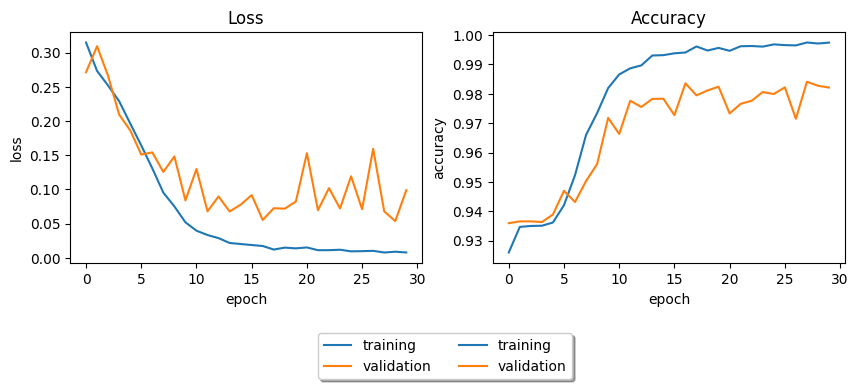

Finished processing column: left_subarticular_stenosis_l1_l2



Processing images:  17%|█▋        | 322/1891 [07:57<46:58,  1.80s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1891/1891 [49:36<00:00,  1.57s/it]  
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.7272 - loss: 0.8056
Epoch 1: val_loss improved from inf to 0.64043, saving model to _left_subarticular_stenosis_l2_l3.keras
424/424 ━━━━━━━━━━━━━━━━━━━━ 136s 302ms/step - accuracy: 0.7274 - loss: 0.8052 - val_accuracy: 0.8102 - val_loss: 0.6404
Epoch 2/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8167 - loss: 0.5316
Epoch 2: val_loss improved from 0.64043 to 0.53748, saving model to _left_subarticular_stenosis_l2_l3.keras
424/424 ━━━━━━━━━━━━━━━━━━━━ 128s 303ms/step - accuracy: 0.8167 - loss: 0.5316 - val_accuracy: 0.8234 - val_loss: 0.5375
Epoch 3/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8191 - loss: 0.4891
Epoch 3: val_loss did not improve from 0.53748
424/424 ━━━━━━━━━━━━━━━━━━━━ 126s 296ms/step - accuracy: 0.8191 - loss: 0.4891 - val_accuracy: 0.8245 - val_loss: 0.5424
Epoch 4/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8266 - loss: 0.4400
Epoch 4: val_loss improved

424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9915 - loss: 0.0242
Epoch 24: val_loss did not improve from 0.12498
424/424 ━━━━━━━━━━━━━━━━━━━━ 123s 291ms/step - accuracy: 0.9915 - loss: 0.0242 - val_accuracy: 0.9595 - val_loss: 0.1328
Epoch 25/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9927 - loss: 0.0208
Epoch 25: val_loss did not improve from 0.12498
424/424 ━━━━━━━━━━━━━━━━━━━━ 126s 296ms/step - accuracy: 0.9927 - loss: 0.0208 - val_accuracy: 0.9592 - val_loss: 0.1390
Epoch 26/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9926 - loss: 0.0214
Epoch 26: val_loss improved from 0.12498 to 0.11617, saving model to _left_subarticular_stenosis_l2_l3.keras
424/424 ━━━━━━━━━━━━━━━━━━━━ 121s 286ms/step - accuracy: 0.9926 - loss: 0.0215 - val_accuracy: 0.9654 - val_loss: 0.1162
Epoch 27/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9941 - loss: 0.0161
Epoch 27: val_loss did not improve from 0.11617
424/424 ━━━━━━━━━━━━━━━━━━━━ 122s 288ms/

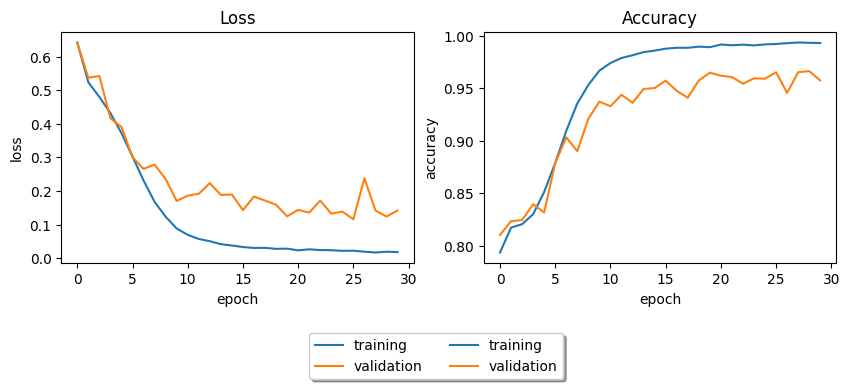

Finished processing column: left_subarticular_stenosis_l2_l3



Processing images:  17%|█▋        | 332/1970 [08:27<50:31,  1.85s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1970/1970 [52:52<00:00,  1.61s/it]  
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.5960 - loss: 0.9756
Epoch 1: val_loss improved from inf to 0.81203, saving model to _left_subarticular_stenosis_l3_l4.keras
432/432 ━━━━━━━━━━━━━━━━━━━━ 140s 304ms/step - accuracy: 0.5961 - loss: 0.9754 - val_accuracy: 0.6393 - val_loss: 0.8120
Epoch 2/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.6589 - loss: 0.7683
Epoch 2: val_loss improved from 0.81203 to 0.69148, saving model to _left_subarticular_stenosis_l3_l4.keras
432/432 ━━━━━━━━━━━━━━━━━━━━ 120s 279ms/step - accuracy: 0.6589 - loss: 0.7682 - val_accuracy: 0.6875 - val_loss: 0.6915
Epoch 3/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.6867 - loss: 0.6954
Epoch 3: val_loss did not improve from 0.69148
432/432 ━━━━━━━━━━━━━━━━━━━━ 125s 290ms/step - accuracy: 0.6868 - loss: 0.6954 - val_accuracy: 0.6566 - val_loss: 0.7113
Epoch 4/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7156 - loss: 0.6343
Epoch 4: val_loss improved

Epoch 24/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9899 - loss: 0.0292
Epoch 24: val_loss did not improve from 0.20155
432/432 ━━━━━━━━━━━━━━━━━━━━ 125s 289ms/step - accuracy: 0.9899 - loss: 0.0292 - val_accuracy: 0.9377 - val_loss: 0.2431
Epoch 25/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9891 - loss: 0.0308
Epoch 25: val_loss did not improve from 0.20155
432/432 ━━━━━━━━━━━━━━━━━━━━ 128s 296ms/step - accuracy: 0.9891 - loss: 0.0308 - val_accuracy: 0.9407 - val_loss: 0.2374
Epoch 26/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9893 - loss: 0.0313
Epoch 26: val_loss did not improve from 0.20155
432/432 ━━━━━━━━━━━━━━━━━━━━ 124s 286ms/step - accuracy: 0.9893 - loss: 0.0313 - val_accuracy: 0.9095 - val_loss: 0.3171
Epoch 27/30
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9867 - loss: 0.0382
Epoch 27: val_loss did not improve from 0.20155
432/432 ━━━━━━━━━━━━━━━━━━━━ 129s 299ms/step - accuracy: 0.9867 - loss: 0.0381 - val_accu

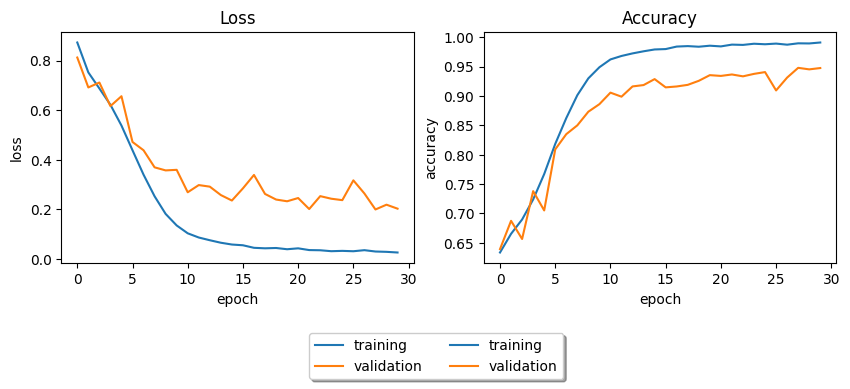

Finished processing column: left_subarticular_stenosis_l3_l4



Processing images:  17%|█▋        | 333/1970 [08:28<48:38,  1.78s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1970/1970 [51:37<00:00,  1.57s/it] 
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_95 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.3861 - loss: 1.1900
Epoch 1: val_loss improved from inf to 1.08228, saving model to _left_subarticular_stenosis_l4_l5.keras
427/427 ━━━━━━━━━━━━━━━━━━━━ 131s 287ms/step - accuracy: 0.3862 - loss: 1.1899 - val_accuracy: 0.4546 - val_loss: 1.0823
Epoch 2/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.4673 - loss: 1.0265
Epoch 2: val_loss improved from 1.08228 to 0.97641, saving model to _left_subarticular_stenosis_l4_l5.keras
427/427 ━━━━━━━━━━━━━━━━━━━━ 121s 282ms/step - accuracy: 0.4674 - loss: 1.0265 - val_accuracy: 0.5020 - val_loss: 0.9764
Epoch 3/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.5228 - loss: 0.9537
Epoch 3: val_loss improved from 0.97641 to 0.93692, saving model to _left_subarticular_stenosis_l4_l5.keras
427/427 ━━━━━━━━━━━━━━━━━━━━ 123s 288ms/step - accuracy: 0.5229 - loss: 0.9536 - val_accuracy: 0.5324 - val_loss: 0.9369
Epoch 4/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step

427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9831 - loss: 0.0473
Epoch 23: val_loss improved from 0.30385 to 0.27266, saving model to _left_subarticular_stenosis_l4_l5.keras
427/427 ━━━━━━━━━━━━━━━━━━━━ 145s 302ms/step - accuracy: 0.9830 - loss: 0.0474 - val_accuracy: 0.9175 - val_loss: 0.2727
Epoch 24/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9856 - loss: 0.0404
Epoch 24: val_loss did not improve from 0.27266
427/427 ━━━━━━━━━━━━━━━━━━━━ 140s 297ms/step - accuracy: 0.9856 - loss: 0.0404 - val_accuracy: 0.9061 - val_loss: 0.3438
Epoch 25/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9862 - loss: 0.0407
Epoch 25: val_loss did not improve from 0.27266
427/427 ━━━━━━━━━━━━━━━━━━━━ 124s 289ms/step - accuracy: 0.9862 - loss: 0.0407 - val_accuracy: 0.9062 - val_loss: 0.3417
Epoch 26/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9851 - loss: 0.0415
Epoch 26: val_loss did not improve from 0.27266
427/427 ━━━━━━━━━━━━━━━━━━━━ 129s 302ms/

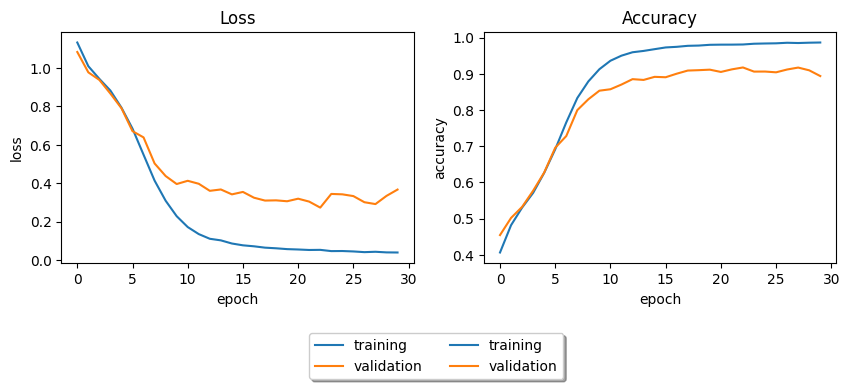

Finished processing column: left_subarticular_stenosis_l4_l5



Processing images:  17%|█▋        | 332/1963 [08:46<48:26,  1.78s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1963/1963 [51:12<00:00,  1.57s/it] 
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)             │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.6593 - loss: 0.8848
Epoch 1: val_loss improved from inf to 0.79934, saving model to _left_subarticular_stenosis_l5_s1.keras
425/425 ━━━━━━━━━━━━━━━━━━━━ 135s 296ms/step - accuracy: 0.6594 - loss: 0.8847 - val_accuracy: 0.7006 - val_loss: 0.7993
Epoch 2/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.7058 - loss: 0.7830
Epoch 2: val_loss did not improve from 0.79934
425/425 ━━━━━━━━━━━━━━━━━━━━ 122s 287ms/step - accuracy: 0.7058 - loss: 0.7830 - val_accuracy: 0.5242 - val_loss: 1.0380
Epoch 3/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.7074 - loss: 0.7534
Epoch 3: val_loss did not improve from 0.79934
425/425 ━━━━━━━━━━━━━━━━━━━━ 142s 288ms/step - accuracy: 0.7074 - loss: 0.7534 - val_accuracy: 0.7066 - val_loss: 0.8619
Epoch 4/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.7080 - loss: 0.7260
Epoch 4: val_loss improved from 0.79934 to 0.72021, saving model to _left_subarticular_

Epoch 24/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9903 - loss: 0.0299
Epoch 24: val_loss did not improve from 0.25434
425/425 ━━━━━━━━━━━━━━━━━━━━ 118s 279ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9307 - val_loss: 0.3093
Epoch 25/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.9914 - loss: 0.0263
Epoch 25: val_loss did not improve from 0.25434
425/425 ━━━━━━━━━━━━━━━━━━━━ 121s 284ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9234 - val_loss: 0.3377
Epoch 26/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9892 - loss: 0.0319
Epoch 26: val_loss improved from 0.25434 to 0.24685, saving model to _left_subarticular_stenosis_l5_s1.keras
425/425 ━━━━━━━━━━━━━━━━━━━━ 121s 284ms/step - accuracy: 0.9892 - loss: 0.0319 - val_accuracy: 0.9352 - val_loss: 0.2469
Epoch 27/30
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.9909 - loss: 0.0259
Epoch 27: val_loss did not improve from 0.24685
425/425 ━━━━━━━━━━━━━━━━━━━━

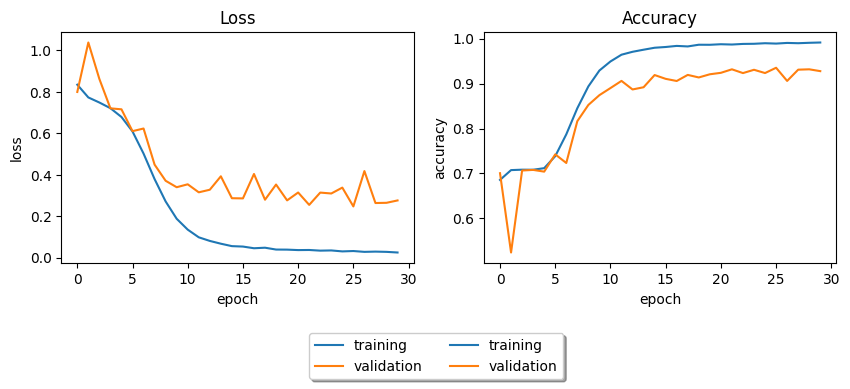

Finished processing column: left_subarticular_stenosis_l5_s1



Processing images:  17%|█▋        | 309/1812 [08:11<44:35,  1.78s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1812/1812 [50:10<00:00,  1.66s/it] 
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)             │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.8740 - loss: 0.4342
Epoch 1: val_loss improved from inf to 0.28475, saving model to _right_subarticular_stenosis_l1_l2.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 130s 293ms/step - accuracy: 0.8741 - loss: 0.4340 - val_accuracy: 0.9278 - val_loss: 0.2847
Epoch 2/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9259 - loss: 0.2965
Epoch 2: val_loss improved from 0.28475 to 0.26630, saving model to _right_subarticular_stenosis_l1_l2.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 130s 315ms/step - accuracy: 0.9259 - loss: 0.2965 - val_accuracy: 0.9278 - val_loss: 0.2663
Epoch 3/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9258 - loss: 0.2763
Epoch 3: val_loss improved from 0.26630 to 0.24331, saving model to _right_subarticular_stenosis_l1_l2.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 128s 312ms/step - accuracy: 0.9258 - loss: 0.2762 - val_accuracy: 0.9278 - val_loss: 0.2433
Epoch 4/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/s

Epoch 24/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9964 - loss: 0.0111
Epoch 24: val_loss did not improve from 0.05606
411/411 ━━━━━━━━━━━━━━━━━━━━ 122s 297ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9811 - val_loss: 0.0702
Epoch 25/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9968 - loss: 0.0096
Epoch 25: val_loss did not improve from 0.05606
411/411 ━━━━━━━━━━━━━━━━━━━━ 123s 299ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9834 - val_loss: 0.0674
Epoch 26/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9967 - loss: 0.0095
Epoch 26: val_loss did not improve from 0.05606
411/411 ━━━━━━━━━━━━━━━━━━━━ 123s 298ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9830 - val_loss: 0.0832
Epoch 27/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9972 - loss: 0.0091
Epoch 27: val_loss did not improve from 0.05606
411/411 ━━━━━━━━━━━━━━━━━━━━ 123s 300ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accu

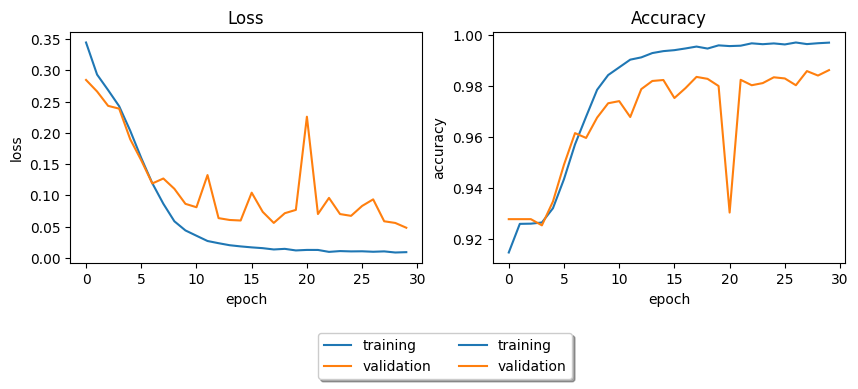

Finished processing column: right_subarticular_stenosis_l1_l2



Processing images:  17%|█▋        | 322/1891 [08:03<48:47,  1.87s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1891/1891 [50:31<00:00,  1.60s/it] 
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_110 (Conv2D)             │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_114 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7813 - loss: 0.6674
Epoch 1: val_loss improved from inf to 0.68866, saving model to _right_subarticular_stenosis_l2_l3.keras
423/423 ━━━━━━━━━━━━━━━━━━━━ 134s 299ms/step - accuracy: 0.7814 - loss: 0.6672 - val_accuracy: 0.8264 - val_loss: 0.6887
Epoch 2/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8259 - loss: 0.5066
Epoch 2: val_loss improved from 0.68866 to 0.55179, saving model to _right_subarticular_stenosis_l2_l3.keras
423/423 ━━━━━━━━━━━━━━━━━━━━ 125s 295ms/step - accuracy: 0.8259 - loss: 0.5066 - val_accuracy: 0.8265 - val_loss: 0.5518
Epoch 3/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8308 - loss: 0.4575
Epoch 3: val_loss improved from 0.55179 to 0.50922, saving model to _right_subarticular_stenosis_l2_l3.keras
423/423 ━━━━━━━━━━━━━━━━━━━━ 119s 281ms/step - accuracy: 0.8308 - loss: 0.4575 - val_accuracy: 0.8238 - val_loss: 0.5092
Epoch 4/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/s

Epoch 24/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9946 - loss: 0.0170
Epoch 24: val_loss did not improve from 0.14441
423/423 ━━━━━━━━━━━━━━━━━━━━ 130s 307ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9622 - val_loss: 0.1486
Epoch 25/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9945 - loss: 0.0168
Epoch 25: val_loss did not improve from 0.14441
423/423 ━━━━━━━━━━━━━━━━━━━━ 139s 301ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9635 - val_loss: 0.1658
Epoch 26/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9945 - loss: 0.0168
Epoch 26: val_loss did not improve from 0.14441
423/423 ━━━━━━━━━━━━━━━━━━━━ 130s 308ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9560 - val_loss: 0.1776
Epoch 27/30
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9949 - loss: 0.0164
Epoch 27: val_loss did not improve from 0.14441
423/423 ━━━━━━━━━━━━━━━━━━━━ 130s 307ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accu

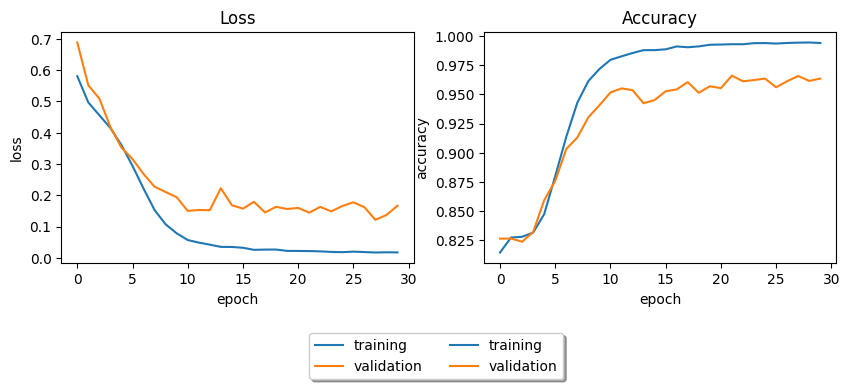

Finished processing column: right_subarticular_stenosis_l2_l3



Processing images:  17%|█▋        | 332/1971 [08:07<46:39,  1.71s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1971/1971 [51:53<00:00,  1.58s/it]  
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_115 (Conv2D)             │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_116 (Conv2D)             │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_119 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6184 - loss: 0.9253
Epoch 1: val_loss improved from inf to 0.79838, saving model to _right_subarticular_stenosis_l3_l4.keras
431/431 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.6185 - loss: 0.9252 - val_accuracy: 0.6635 - val_loss: 0.7984
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.6595 - loss: 0.7639
Epoch 2: val_loss did not improve from 0.79838
431/431 ━━━━━━━━━━━━━━━━━━━━ 131s 303ms/step - accuracy: 0.6596 - loss: 0.7638 - val_accuracy: 0.6633 - val_loss: 0.8824
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6745 - loss: 0.7140
Epoch 3: val_loss improved from 0.79838 to 0.66581, saving model to _right_subarticular_stenosis_l3_l4.keras
431/431 ━━━━━━━━━━━━━━━━━━━━ 140s 300ms/step - accuracy: 0.6745 - loss: 0.7139 - val_accuracy: 0.6968 - val_loss: 0.6658
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.7024 - loss: 0.6490
Epoch 4: val_loss did no

Epoch 24/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9870 - loss: 0.0364
Epoch 24: val_loss did not improve from 0.20752
431/431 ━━━━━━━━━━━━━━━━━━━━ 130s 301ms/step - accuracy: 0.9870 - loss: 0.0364 - val_accuracy: 0.9401 - val_loss: 0.2164
Epoch 25/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9865 - loss: 0.0378
Epoch 25: val_loss did not improve from 0.20752
431/431 ━━━━━━━━━━━━━━━━━━━━ 131s 303ms/step - accuracy: 0.9865 - loss: 0.0378 - val_accuracy: 0.9301 - val_loss: 0.2702
Epoch 26/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9875 - loss: 0.0346
Epoch 26: val_loss did not improve from 0.20752
431/431 ━━━━━━━━━━━━━━━━━━━━ 127s 294ms/step - accuracy: 0.9875 - loss: 0.0346 - val_accuracy: 0.9354 - val_loss: 0.2348
Epoch 27/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9848 - loss: 0.0444
Epoch 27: val_loss did not improve from 0.20752
431/431 ━━━━━━━━━━━━━━━━━━━━ 130s 303ms/step - accuracy: 0.9848 - loss: 0.0443 - val_accu

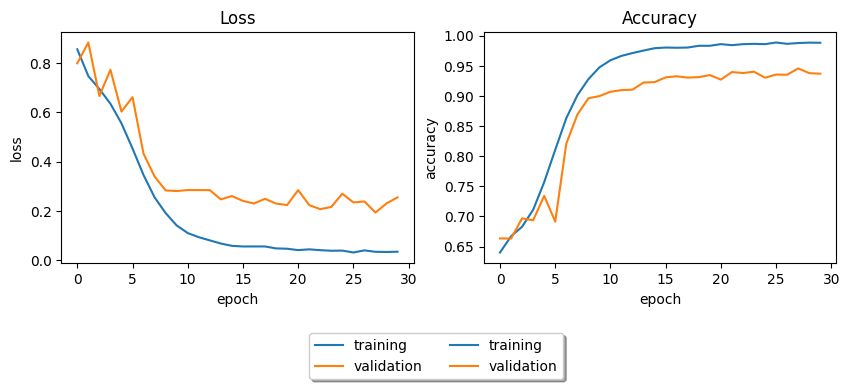

Finished processing column: right_subarticular_stenosis_l3_l4



Processing images:  17%|█▋        | 333/1971 [08:07<46:49,  1.72s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1971/1971 [51:46<00:00,  1.58s/it]  
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)             │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.4017 - loss: 1.1730
Epoch 1: val_loss improved from inf to 1.06634, saving model to _right_subarticular_stenosis_l4_l5.keras
426/426 ━━━━━━━━━━━━━━━━━━━━ 138s 305ms/step - accuracy: 0.4018 - loss: 1.1729 - val_accuracy: 0.3957 - val_loss: 1.0663
Epoch 2/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.4839 - loss: 0.9956
Epoch 2: val_loss improved from 1.06634 to 0.99661, saving model to _right_subarticular_stenosis_l4_l5.keras
426/426 ━━━━━━━━━━━━━━━━━━━━ 141s 302ms/step - accuracy: 0.4839 - loss: 0.9956 - val_accuracy: 0.4969 - val_loss: 0.9966
Epoch 3/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5345 - loss: 0.9248
Epoch 3: val_loss improved from 0.99661 to 0.91718, saving model to _right_subarticular_stenosis_l4_l5.keras
426/426 ━━━━━━━━━━━━━━━━━━━━ 133s 313ms/step - accuracy: 0.5346 - loss: 0.9248 - val_accuracy: 0.5374 - val_loss: 0.9172
Epoch 4/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/s

426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9855 - loss: 0.0418
Epoch 23: val_loss did not improve from 0.31700
426/426 ━━━━━━━━━━━━━━━━━━━━ 137s 321ms/step - accuracy: 0.9855 - loss: 0.0418 - val_accuracy: 0.9031 - val_loss: 0.3266
Epoch 24/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9835 - loss: 0.0471
Epoch 24: val_loss improved from 0.31700 to 0.30651, saving model to _right_subarticular_stenosis_l4_l5.keras
426/426 ━━━━━━━━━━━━━━━━━━━━ 139s 325ms/step - accuracy: 0.9835 - loss: 0.0471 - val_accuracy: 0.9085 - val_loss: 0.3065
Epoch 25/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9855 - loss: 0.0399
Epoch 25: val_loss did not improve from 0.30651
426/426 ━━━━━━━━━━━━━━━━━━━━ 138s 324ms/step - accuracy: 0.9855 - loss: 0.0399 - val_accuracy: 0.9047 - val_loss: 0.3205
Epoch 26/30
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9833 - loss: 0.0459
Epoch 26: val_loss did not improve from 0.30651
426/426 ━━━━━━━━━━━━━━━━━━━━ 139s 326ms

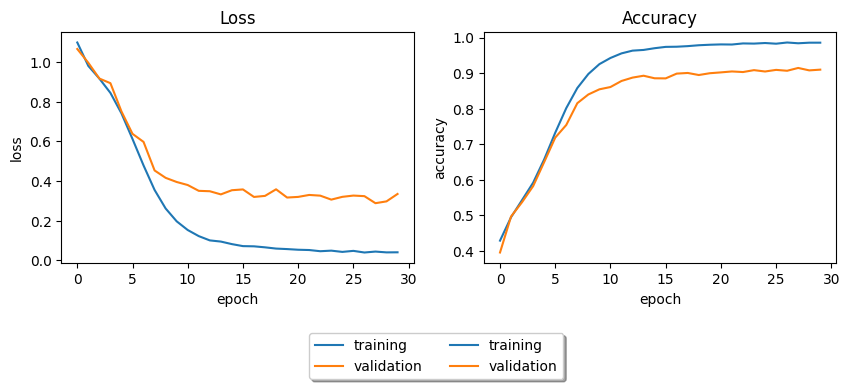

Finished processing column: right_subarticular_stenosis_l4_l5



Processing images:  17%|█▋        | 333/1967 [08:12<47:32,  1.75s/it]  C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:94: RuntimeWarning: invalid value encountered in divide
  data = data / np.max(data)
C:\Users\zbook g9\AppData\Local\Temp\ipykernel_14364\1664990949.py:96: RuntimeWarning: invalid value encountered in cast
  return (data * 255).astype(np.uint8)
Processing images: 100%|██████████| 1967/1967 [49:54<00:00,  1.52s/it] 
E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_125 (Conv2D)             │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 25, 25, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 12, 12, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_102               │ (None, 6, 6, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 3, 3, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,048,963 (7.82 MB)

 Trainable params: 2,046,915 (7.81 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.6446 - loss: 0.9099
Epoch 1: val_loss improved from inf to 0.80702, saving model to _right_subarticular_stenosis_l5_s1.keras
424/424 ━━━━━━━━━━━━━━━━━━━━ 147s 317ms/step - accuracy: 0.6447 - loss: 0.9098 - val_accuracy: 0.6977 - val_loss: 0.8070
Epoch 2/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.7009 - loss: 0.7937
Epoch 2: val_loss did not improve from 0.80702
424/424 ━━━━━━━━━━━━━━━━━━━━ 137s 323ms/step - accuracy: 0.7009 - loss: 0.7937 - val_accuracy: 0.7010 - val_loss: 0.8545
Epoch 3/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.7014 - loss: 0.7727
Epoch 3: val_loss improved from 0.80702 to 0.80108, saving model to _right_subarticular_stenosis_l5_s1.keras
424/424 ━━━━━━━━━━━━━━━━━━━━ 143s 325ms/step - accuracy: 0.7014 - loss: 0.7727 - val_accuracy: 0.7010 - val_loss: 0.8011
Epoch 4/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.7027 - loss: 0.7405
Epoch 4: val_loss improv

424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9870 - loss: 0.0364
Epoch 23: val_loss did not improve from 0.22010
424/424 ━━━━━━━━━━━━━━━━━━━━ 135s 303ms/step - accuracy: 0.9870 - loss: 0.0364 - val_accuracy: 0.9249 - val_loss: 0.3139
Epoch 24/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9895 - loss: 0.0295
Epoch 24: val_loss did not improve from 0.22010
424/424 ━━━━━━━━━━━━━━━━━━━━ 135s 319ms/step - accuracy: 0.9895 - loss: 0.0295 - val_accuracy: 0.9294 - val_loss: 0.2636
Epoch 25/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9906 - loss: 0.0267
Epoch 25: val_loss did not improve from 0.22010
424/424 ━━━━━━━━━━━━━━━━━━━━ 133s 313ms/step - accuracy: 0.9906 - loss: 0.0267 - val_accuracy: 0.9324 - val_loss: 0.2713
Epoch 26/30
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9915 - loss: 0.0240
Epoch 26: val_loss did not improve from 0.22010
424/424 ━━━━━━━━━━━━━━━━━━━━ 135s 318ms/step - accuracy: 0.9915 - loss: 0.0240 - val_accuracy: 0.9313

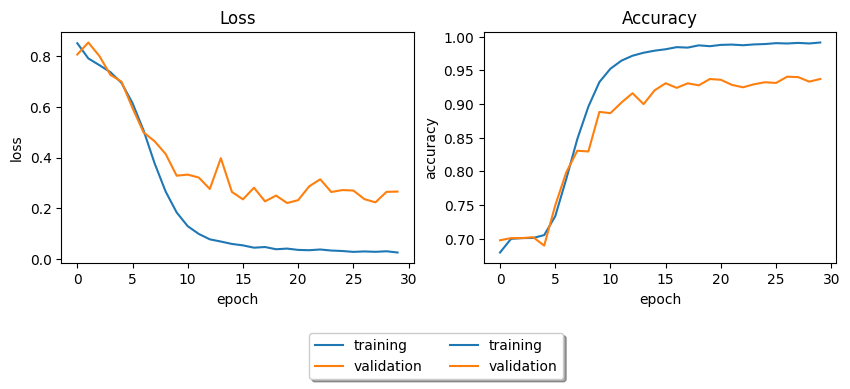

Finished processing column: right_subarticular_stenosis_l5_s1



In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar
from tensorflow.keras.utils import to_categorical
from keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

def transform_condition(column):
    # Convert to lowercase
    column = column.lower()
    
    # Replace underscores and slashes
    column = column.replace(' ', '_')
    column = column.replace('/', '_')
    
    return column

data_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv' 
data = pd.read_csv(data_path)  

# columns=['study_id', 'spinal_canal_stenosis_l1_l2']#just to train model=_spinal_canal_stenosis_l1_l2


    # Replace with the path to your CSV file
train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'

    # Load the CSV file into a DataFrame
df = pd.read_csv(train_csv_path)


    # Path to the CSV file with condition and level
column_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train_label_coordinates.csv'

    # Read the CSV file
column_df = pd.read_csv(column_csv_path)

    # Remove rows where 'study_id' is NaN or empty string
column_df = column_df[column_df['study_id'].notna() & (column_df['study_id'] != '')]

    # Ensure that columns to be merged are treated as strings
column_df['condition'] = column_df['condition'].astype(str)
column_df['level'] = column_df['level'].astype(str)

    # Merge 'condition' and 'level' into a single column
column_df['condition_level'] = column_df['condition'] + '_' + column_df['level']

    # Drop the original 'condition' and 'level' columns if no longer needed
    # label_df.drop(['condition', 'level'], axis=1, inplace=True)

# Reorder columns if needed to have 'study_id', 'series_id', and 'instance_number' first
column_df = column_df[['study_id', 'series_id', 'instance_number', 'condition_level', 'condition', 'level']]


column_df['condition_level'] = column_df['condition_level'].apply(transform_condition)
column_df = column_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)




columns = data.columns                           #This line must be run to get all models

for column in columns[1:]:
    column_name=column
    # Filter the dataframe based on the condition level
    df_path = column_df[column_df['condition_level'] == column_name]
    train_csv_path = 'E:/data/Lumbar Spine Degenerative Classification/train.csv'
    df_train = pd.read_csv(train_csv_path)

    # Identify NaN study_ids in df_train
    nan_study_ids = df_train[df_train[column_name].isna()]['study_id'].tolist()
    df_filtered = df_path[~df_path['study_id'].isin(nan_study_ids)]
    df_train = df_train[['study_id', column_name]].dropna()

    # Function to read DICOM images
    def read_dicom_image(file_path, voi_lut=True, fix_monochrome=True):
        dicom = pydicom.dcmread(file_path)
        if voi_lut:
            data = apply_voi_lut(dicom.pixel_array, dicom)
        else:
            data = dicom.pixel_array

        if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
            data = np.amax(data) - data

        data = data - np.min(data)
        data = data / np.max(data)

        return (data * 255).astype(np.uint8)

    # Paths to your image directory
    image_base_path = 'E:/data/Lumbar Spine Degenerative Classification/train_images/'
    images = []
    labels = []

    # Iterate over each row in the filtered dataframe to get study_id, series_id, instance_number
    for idx, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0], desc="Processing images"):
    # for idx, row in df_filtered.iterrows():
        study_id = str(row['study_id'])
        series_id = str(row['series_id'])
        instance_number = row['instance_number']

        # Construct the path to the series folder
        series_path = os.path.join(image_base_path, study_id, series_id)

        if not os.path.exists(series_path):
            print(f"Warning: The path {series_path} does not exist.")
            continue

        # Get the label for the current study_id
        label_value = df_train[df_train['study_id'] == int(study_id)][column_name].values
        if len(label_value) > 0:
            label_value = label_value[0]  # Extract the actual label value
        else:
            print(f"Warning: No label found for study_id {study_id}")
            continue

        # Now read all DICOM files in the series path and assign the same label
        dicom_files = sorted(
            [f for f in os.listdir(series_path) if f.lower().endswith('.dcm')],
            key=lambda x: int(os.path.splitext(x)[0])
        )

        for dicom_file in dicom_files:
            other_file_path = os.path.join(series_path, dicom_file)

            # Skip the file if it doesn't exist
            if not os.path.exists(other_file_path):
                print(f"Warning: File {other_file_path} does not exist.")
                continue

            try:
                # Read and process the DICOM image
                other_image = read_dicom_image(other_file_path)

                if other_image.size == 0:
                    print(f"Warning: Skipping file {other_file_path}, image size is zero.")
                    continue

                # Resize and process the image
                other_image = np.array(cv2.resize(other_image, (50, 50), interpolation=cv2.INTER_AREA))
                other_image = np.stack((other_image,) * 3, axis=-1)
                other_image = other_image.astype('float32') / 255

                # Append this image and assign it the same label
                images.append(other_image)
                labels.append(label_value)

            except Exception as e:
                print(f"Error processing file {other_file_path}: {e}")
                continue
     # Ensure labels do not have any None values
    valid_idx = [i for i, label in enumerate(labels) if label is not None]

    # Filter images and labels based on valid indices
    images = np.array([images[i] for i in valid_idx])
    labels = np.array([labels[i] for i in valid_idx])

    # Encode labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Split the data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

    # Ensure consistent number of classes for one-hot encoding
    num_classes = len(np.unique(labels_encoded))

    # One-hot encode labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_val = to_categorical(y_val, num_classes=num_classes)

    # Model definition
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(50, 50, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))    
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))    
    model.add(layers.Flatten())  
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))

    # Output layer for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print model summary
    model.summary()

    # Define ModelCheckpoint callback to save the best model based on validation loss
    model_save = f"_{column_name}.keras"  # dynamically use the column name in the model save path
    checkpoint = ModelCheckpoint(
        filepath=model_save,  
        monitor='val_loss',   
        save_best_only=True,  
        verbose=1             
    )

    # Train the model for exactly 30 epochs and save the best model
    history = model.fit(
        x_train, y_train,
        epochs=30,
        batch_size=128,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint]  # Save only the best model
    )

    # Plot the training and validation loss and accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

    # Plot loss
    ax1.plot(history.history['loss'], label='training')
    ax1.plot(history.history['val_loss'], label='validation')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.set_title('Loss')

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='training')
    ax2.plot(history.history['val_accuracy'], label='validation')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('Accuracy')

    # Display legend
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)

    # Show plot
    plt.show()

    print(f"Finished processing column: {column_name}\n")  

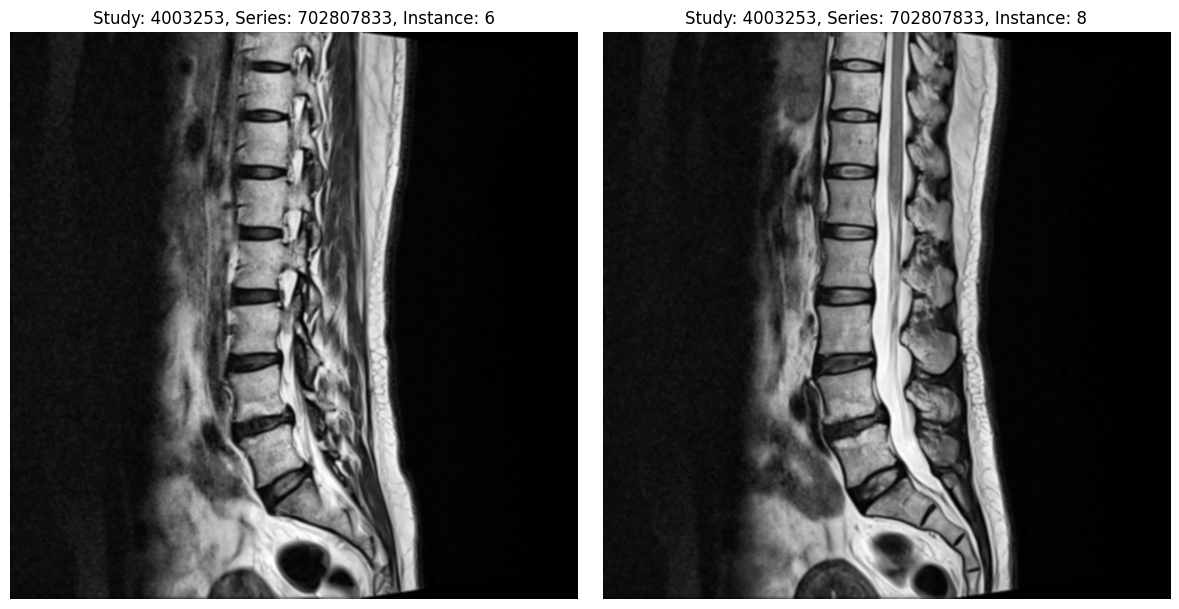

In [3]:
import os
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

def read_dicom_image(file_path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.dcmread(file_path)
    
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array

    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data

    # Normalize the pixel values between 0 and 1
    data = data - np.min(data)
    data = data / np.max(data)

    # Convert to 8-bit grayscale (0-255 range)
    return (data * 255).astype(np.uint8)

def enhance_image(image):
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) for better contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)

    # Optionally, apply Gaussian Blurring to reduce noise
    image = cv2.GaussianBlur(image, (5, 5), 0)

    return image

def show_two_dicom_images(study_id_1, series_id_1, instance_number_1, 
                          study_id_2, series_id_2, instance_number_2):
    # Base path to the images
    image_base_path = 'E:/data/Lumbar Spine Degenerative Classification/train_images/'
    
    # Construct the file paths for both images
    series_path_1 = os.path.join(image_base_path, str(study_id_1), str(series_id_1))
    file_path_1 = os.path.join(series_path_1, f"{instance_number_1}.dcm")
    
    series_path_2 = os.path.join(image_base_path, str(study_id_2), str(series_id_2))
    file_path_2 = os.path.join(series_path_2, f"{instance_number_2}.dcm")
    
    if not os.path.exists(file_path_1):
        print(f"File {file_path_1} does not exist.")
        return
    
    if not os.path.exists(file_path_2):
        print(f"File {file_path_2} does not exist.")
        return
    
    try:
        # Read and process both DICOM images
        image1 = read_dicom_image(file_path_1)
        image2 = read_dicom_image(file_path_2)
        
        # Enhance the images using CLAHE and Gaussian Blurring
        enhanced_image1 = enhance_image(image1)
        enhanced_image2 = enhance_image(image2)
        
        # Plot and display the two images side by side using matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Display the first image
        axes[0].imshow(enhanced_image1, cmap='gray')
        axes[0].set_title(f'Study: {study_id_1}, Series: {series_id_1}, Instance: {instance_number_1}')
        axes[0].axis('off')  # Hide axis labels
        
        # Display the second image
        axes[1].imshow(enhanced_image2, cmap='gray')
        axes[1].set_title(f'Study: {study_id_2}, Series: {series_id_2}, Instance: {instance_number_2}')
        axes[1].axis('off')  # Hide axis labels
        
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Error processing files {file_path_1} and/or {file_path_2}: {e}")

# Example usage:
study_id_1 = 4003253
series_id_1 = 702807833
instance_number_1 = 6


study_id_2 = 4003253
series_id_2 =702807833
instance_number_2 = 8

show_two_dicom_images(study_id_1, series_id_1, instance_number_1, 
                      study_id_2, series_id_2, instance_number_2)


### both images are for one patient but the quality of the picture is different. 
so I will label all images in this folder like the label of instance=8